# PROJECT 4: GLOBAL TERRORISM DATABASE

Applying Bayesian inference to Global Terrorism Database in order to ~predict~ terrorism

## About the Dataset

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2015 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Geography: Worldwide

Time period: 1970-2015, except 1993 (2016 in progress, publication expected June 2017)

Unit of analysis: Attack
Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

##### Definition of terrorism:
"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

## GOALS
(1) EDA

(2) Bayesian inference -- look at difference in incidences of terrorism across globe

(3) Impute number of bombings/explosions that occured in 1993

(4) Description of methods

### (1) Exploratory Data Analysis:
focusing on attacktype1 -- distribution across world, frequency, etc

VIZ

REQUIRED TO PRODUCE AT LEAST ONE VIZ INDEXED BY TIME

### (2) Bayesian Inference
Prior: amount of terror a given area has seen

Update prior with new information (e.g. new year of attacks, additional country within region)

Compare two populations using Bayesian inference. 

Does amount of terror one area has seen differ significantly than that of another area (or time period)?

[For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may make your prior assume that some country is a country in South America with μ average attacks and σ variation across South American countries. You would then update that prior with the information of a single country in South America as well as a separate country in South America. How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)]

**use credible intervals**

**follows pymc walkthrough**

### (3) Imputing Values for 1993
focus on attacktype1 bombings (category 3)

how to best fill in missing values?

    are hemispheres separate models? (come up with better way)
    
apply methodology to other attack categories

turn methodology into pipeline

### (4) Methods
Two-page (four pages double-spaced) report discussing methodology and findings. VIZ as appendices. Include (1) Bayesian test and (2) imputed valuesfor 1993 attacks. Defend prior of Bayesian inference. Justify model used to impute values for 1993.

## Part 1 - Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from __future__ import division
import numpy as np

In [2]:
data = pd.read_csv("../../../For_DSI/GTD_Project/GTD.csv") ##reading in the csv file from the GTD

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(30) #checking it out

eventid  iyear  imonth  iday           approxdate  extended  \
0   197000000001   1970       0     0                  NaN         0   
1   197000000002   1970       0     0                  NaN         0   
2   197001000001   1970       1     0                  NaN         0   
3   197001000002   1970       1     0                  NaN         0   
4   197001000003   1970       1     0                  NaN         0   
5   197001010002   1970       1     1                  NaN         0   
6   197001020001   1970       1     2                  NaN         0   
7   197001020002   1970       1     2                  NaN         0   
8   197001020003   1970       1     2                  NaN         0   
9   197001030001   1970       1     3                  NaN         0   
10  197001050001   1970       1     1                  NaN         0   
11  197001060001   1970       1     6                  NaN         0   
12  197001080001   1970       1     8                  NaN         0   
13  197001090001   1970       1     9                  NaN         0   
14  197001090002   1970       1     9                  NaN         0   
15  197001100001   1970       1    10                  NaN         0   
16  197001110001   1970       1    11                  NaN         0   
17  197001120001   1970       1    12                  NaN         0   
18  197001120002   1970       1    12                  NaN         0   
19  197001130001   1970       1    13                  NaN         0   
20  197001140001   1970       1    14                  NaN         0   
21  197001150001   1970       1    15                  NaN         0   
22  197001190002   1970       1    19                  NaN         0   
23  197001190003   1970       1    19                  NaN         0   
24  197001190004   1970       1    19  January 19-20, 1970         0   
25  197001200001   1970       1    20                  NaN         0   
26  197001210001   1970       1    21                  NaN         0   
27  197001220001   1970       1    22                  NaN         0   
28  197001220002   1970       1    22                  NaN         0   
29  197001250001   1970       1    25                  NaN         0   

   resolution  country         country_txt  region   ...     \
0         NaN       58  Dominican Republic       2   ...      
1         NaN      130              Mexico       1   ...      
2         NaN      160         Philippines       5   ...      
3         NaN       78              Greece       8   ...      
4         NaN      101               Japan       4   ...      
5         NaN      217       United States       1   ...      
6         NaN      218             Uruguay       3   ...      
7         NaN      217       United States       1   ...      
8         NaN      217       United States       1   ...      
9         NaN      217       United States       1   ...      
10        NaN      217       United States       1   ...      
11        NaN      217       United States       1   ...      
12        NaN       98               Italy       8   ...      
13        NaN      217       United States       1   ...      
14        NaN      217       United States       1   ...      
15        NaN      499  East Germany (GDR)       9   ...      
16        NaN       65            Ethiopia      11   ...      
17        NaN      217       United States       1   ...      
18        NaN      217       United States       1   ...      
19        NaN      217       United States       1   ...      
20        NaN      217       United States       1   ...      
21        NaN      218             Uruguay       3   ...      
22        NaN      217       United States       1   ...      
23        NaN      217       United States       1   ...      
24        NaN      217       United States       1   ...      
25        NaN       83           Guatemala       2   ...      
26        NaN      160         Philippines       5   ...      
27        Na

In [4]:
##changing display parameters
pd.set_option('display.max_rows', 140)
pd.set_option('display.max_columns', 140)
#pd.set_option('display.max_colwidth', 800)

In [5]:
def EDA(dataframe):
    print "missing values \n", dataframe.isnull().sum(), "\n"
    print "dataframe types \n", dataframe.dtypes, "\n"
    print "dataframe shape \n", dataframe.shape, "\n"
    print "dataframe describe \n", dataframe.describe(), "\n"
    print "dataframe duplicate rows \n", dataframe.duplicated().sum(), "\n"
    for item in dataframe:
        print item
        print dataframe[item].nunique()

In [6]:
EDA(data)

missing values 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            152016
extended                   0
resolution            153270
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           151806
attacktype2_txt            0
attacktype3           156460
attacktype3_txt            

In [7]:
## no duplicate rows
##missing values for lots of columns
##event id is unique identifier for each row
##why are there 13 unique months? Ohh if it's unknown, 0 is provided
##1993 NOT included

In [8]:
data.alternative_txt.unique() ##not sure what this is, but seems interesting

array(['.', 'Other Crime Type', 'Insurgency/Guerilla Action',
       'Intra/Inter-group Conflict', 'State Actors',
       'Lack of Intentionality'], dtype=object)

In [9]:
data.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking',
       'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)'], dtype=object)

In [10]:
data.weaptype1_txt.unique()

array(['Unknown', 'Explosives/Bombs/Dynamite', 'Incendiary', 'Firearms',
       'Chemical', 'Fake Weapons', 'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Radiological', 'Other', 'Biological'], dtype=object)

In [11]:
data.region_txt.unique() ##regions of the world represented in the dataset

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'], dtype=object)

In [12]:
#data93 = pd.read_csv("../../../For_DSI/GTD_Project/1993data.csv") ##reading in the csv file from the GTD
##there are 748 rows for 1993, which is supposed to be 15% of the original data
##we can compare the models we build to impute values to this data, to check for some accuracy, maybe? I'm not sure


In [13]:
#data["date"] = pd.to_datetime(data.eventid)
##this was Nicole's solution -- it works, but it takes zero values for month and day and turns it into
##January first. this will stack attacks to January first of every year, which I don't want
##I'd rather take Mike Salmon's idea, where if month/day is zero, generate random number between 1-12/1-28


In [14]:
#data[data.imonth == 0].shape ##there are 23 entries where month is unknown 

In [15]:
#data[data.iday == 0].shape ##there are 894 entries where day is unknown

In [16]:
##expanding on Mike Salmon's idea to generate random numbers for month and day where values are missing, and imputing
##those values

zeromonth = (data.imonth == 0) ##creating filters
zeroday = (data.iday == 0)

In [17]:
data.loc[zeromonth, "imonth"] = data.imonth.apply(lambda x: np.random.randint(1,13)) ##mapping random month values

In [18]:
## a function to fill in appropriate days of the month
def makemyday(month, day):
    month30 = [4, 6, 9, 11]
    month31 = [1, 3, 5, 7, 8, 10, 12]
    if month == 2:
        day = np.random.randint(1,29)
    elif month in month30:
        day = np.random.randint(1,31)
    elif month in month31:
        day = np.random.randint(1,32)
    else:
        pass
    return day

In [19]:
data.loc[zeroday, "iday"] = data.apply(lambda row: makemyday(row["imonth"], row["iday"]), axis = 1)

In [20]:
#data.loc[zeromonth, "imonth"] = np.random.randint(1,12) ##THIS DOESN'T WORK -- generates random number, applies
##that same number to all cells its filling in

In [21]:
#data.head(30) #checks out woot

In [22]:
data.rename(columns={"iyear":"year", "imonth":"month", "iday":"day"}, inplace=True)

In [23]:
#data.head()

In [24]:
data.approxdate = pd.to_datetime(data[["year", "month", "day"]])

In [25]:
from datetime import datetime
from datetime import timedelta

In [26]:
data["year"] = data.approxdate.dt.year

In [27]:
data["month"] = data.approxdate.dt.month

In [28]:
#data.to_csv("../../../For_DSI/GTD_Project/GTD_fixeddate.csv", index = False)

In [29]:
#bioattacks = data[data.weaptype1_txt == "Biological"]

In [30]:
#EDA(bioattacks)

In [31]:
import pysal
import geopandas as gpd
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

In [32]:
#data[data.attacktype1 == 3]

In [33]:
bombdata = data[["eventid", "approxdate", "year", "month", "country", "country_txt", "region", "region_txt", "city",
                 "latitude", "longitude", "targtype1", "targtype1_txt", "targsubtype1", 
                 "targsubtype1_txt", "corp1", "target1", "natlty1", "natlty1_txt", "gname",
                "weapsubtype1", "weapsubtype1_txt", "nkill", "nkillter", "nwound", "nwoundte", "propextent", "propextent_txt", "propcomment",
                 "addnotes", "scite1", "scite2", "scite3", "dbsource"]][data.attacktype1 == 3]

In [34]:
bombdata.head()

eventid approxdate  year  month  country         country_txt  region  \
3   197001000002 1970-01-14  1970      1       78              Greece       8   
7   197001020002 1970-01-02  1970      1      217       United States       1   
10  197001050001 1970-01-01  1970      1      217       United States       1   
15  197001100001 1970-01-10  1970      1      499  East Germany (GDR)       9   
17  197001120001 1970-01-12  1970      1      217       United States       1   

        region_txt           city   latitude   longitude  targtype1  \
3   Western Europe         Athens  37.983773   23.728157          7   
7    North America        Oakland  37.805065 -122.273024         21   
10   North America        Baraboo  43.468500  -89.744299          4   
15  Eastern Europe    East Berlin  52.516667   13.400000          2   
17   North America  New York City  40.610069  -73.947971          8   

              targtype1_txt  targsubtype1  \
3   Government (Diplomatic)          46.0   
7                 Utilities         107.0   
10                 Military          27.0   
15     Government (General)           NaN   
17  Educational Institution          49.0   

                                 targsubtype1_txt  \
3                               Embassy/Consulate   
7                                     Electricity   
10  Military Barracks/Base/Headquarters/Checkpost   
15                                              .   
17         School/University/Educational Building   

                             corp1                             target1  \
3                              NaN                        U.S. Embassy   
7   Pacific Gas & Electric Company                     Edes Substation   
10                             NaN             Badger Army ammo depot.   
15                             NaN  Jurists Ball (Palais au Frankturm)   
17                     High School           James Madison High School   

    natlty1    natlty1_txt                            gname  weapsubtype1  \
3     217.0  United States                          Unknown          16.0   
7     217.0  United States                          Unknown          16.0   
10    217.0  United States  Weather Underground, Weathermen          16.0   
15     75.0        Germany                        Commune 1          16.0   
17    217.0  United States               Black Nationalists          11.0   

                             weapsubtype1_txt  nkill  nkillter  nwound  \
3                      Unknown Explosive Type    NaN       NaN     NaN   
7                      Unknown Explosive Type    0.0       0.0     0.0   
10                     Unknown Explosive Type    0.0       NaN     0.0   
15                     Unknown Explosive Type    NaN       NaN     NaN   
17  Projectile (rockets, mortars, RPGs, etc.)    0.0       0.0     0.0   

    nwoundte  propextent               propextent_txt  \
3        NaN         NaN                            .   
7        0.0         3.0  Minor (likely < $1 million)   
10       NaN         3.0  Minor (likely < $1 million)   
15       NaN         NaN                            .   
17       0.0         3.0  Minor (likely < $1 million)   

                                          propcomment  \
3                                                 NaN   
7                    Three transformers were damaged.   
10                                                NaN   
15  Damages: none, attempted to detonate device an...   
17  Damaged a blackboard and shattered a pane of g...   

                                             addnotes  \
3                                                 NaN   
7   Damages were estimated to be between $20,000-$...   
10                                                NaN   
15                                                NaN   
17  One half hour after the bomb explosion, an ano...   

                                               scite1  \
3                                                 NaN   
7   Commi

In [35]:
#bombdata.to_csv("../../../For_DSI/GTD_Project/bombdata.csv", index = False)

In [36]:
sns.set(style = "whitegrid")

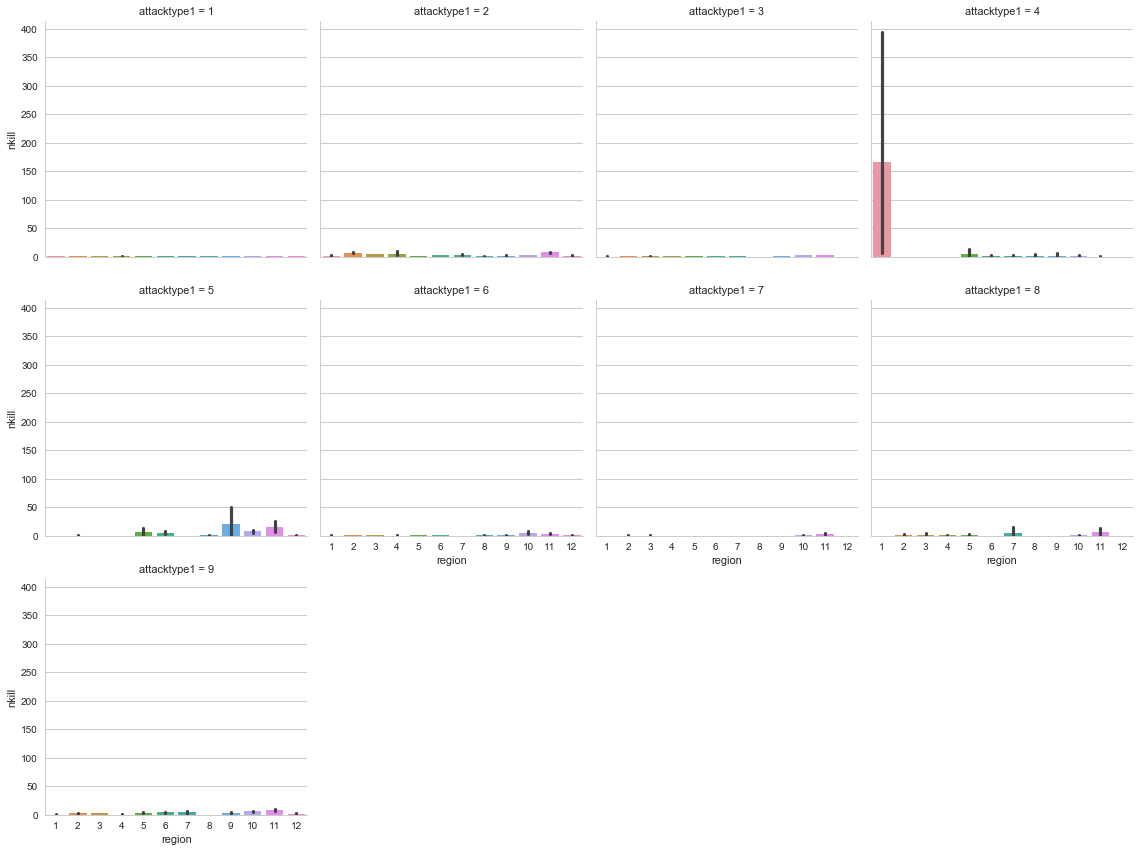

In [37]:
g = sns.factorplot(x="region", y="nkill", col="attacktype1", 
                   data=data, kind="bar", col_wrap=4)

In [38]:
#attacktype1_txt v. nkill

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

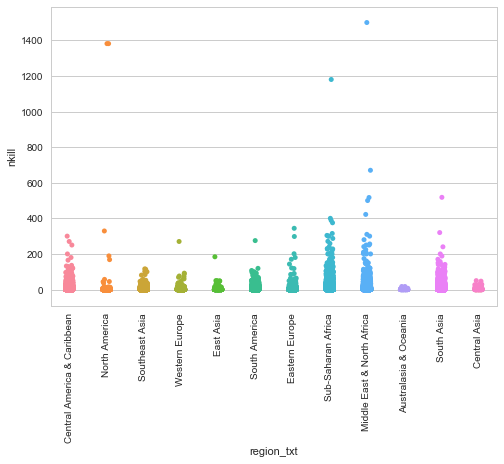

In [39]:
sns.stripplot(x="region_txt", y="nkill", data=data, jitter = True)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

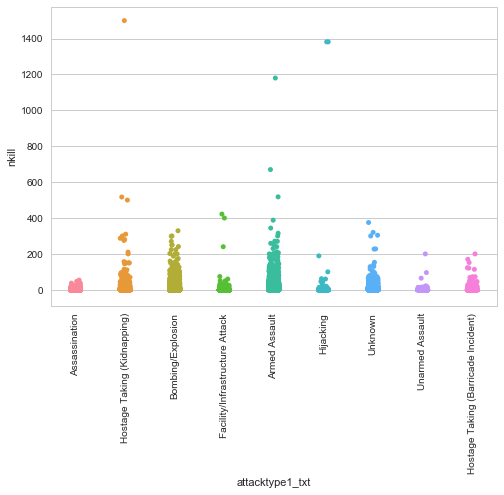

In [40]:
sns.stripplot(x="attacktype1_txt", y="nkill", data=data, jitter = True)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

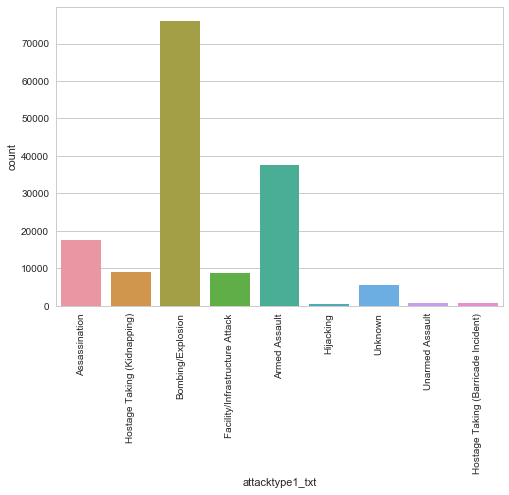

In [41]:
sns.countplot(x="attacktype1_txt", data=data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

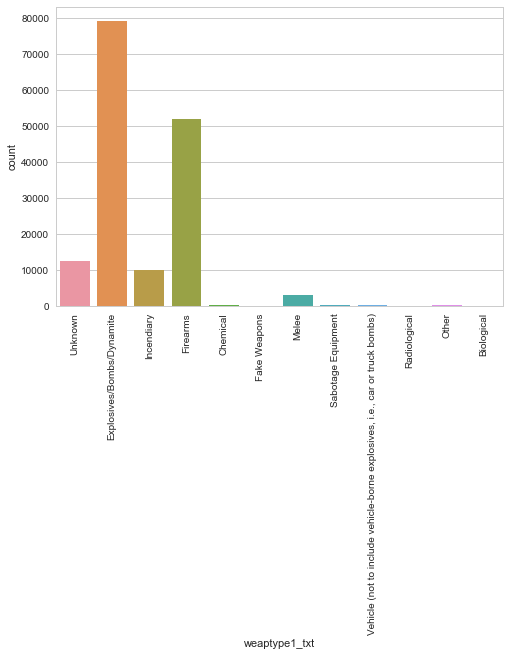

In [42]:
sns.countplot(x="weaptype1_txt", data=data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

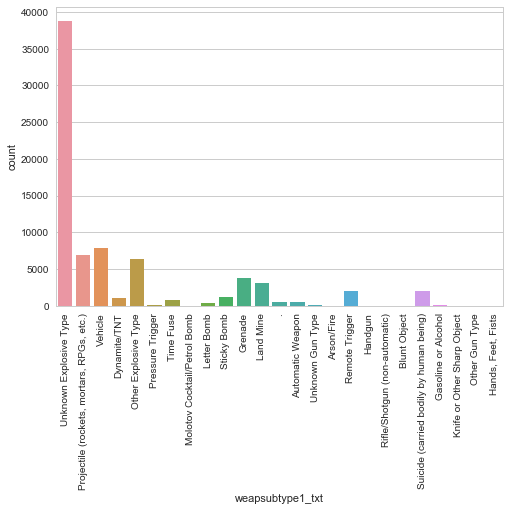

In [43]:
sns.countplot(x="weapsubtype1_txt", data=bombdata)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

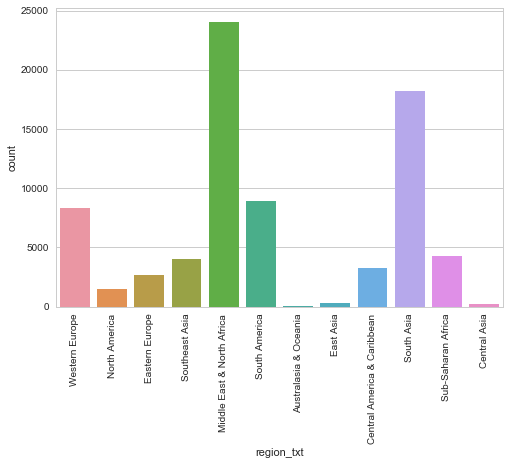

In [44]:
sns.countplot(x="region_txt", data=bombdata)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

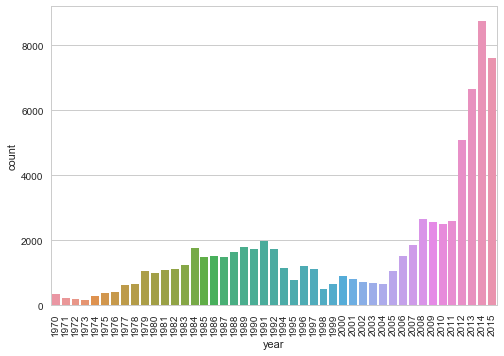

In [45]:
sns.countplot(x="year", data=bombdata)
plt.xticks(rotation = 90)

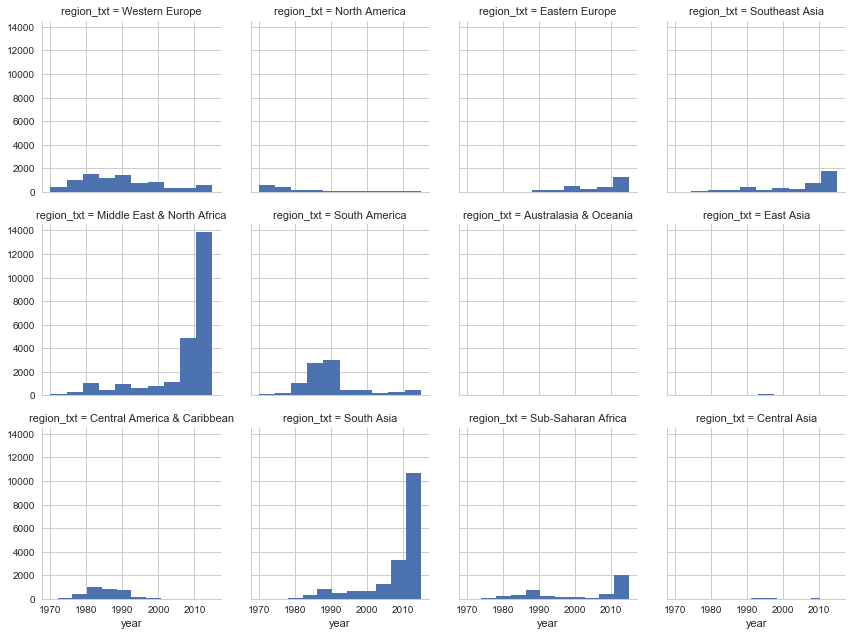

In [46]:
g = sns.FacetGrid(bombdata, col="region_txt", col_wrap=4)
g = (g.map(plt.hist, "year"))

In [47]:
# sns.countplot(x="year", data=bombdata)
# plt.xticks(rotation = 90)

In [48]:
deadlybombs = bombdata.groupby("approxdate").nkill.agg(["sum"])

### TIME VIZ:

In [49]:
dbyear = bombdata.groupby("year").nkill.agg(["sum"])

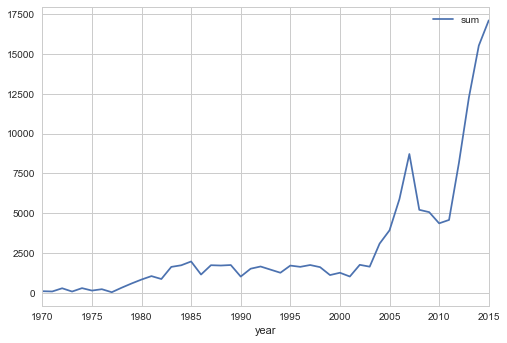

In [50]:
dbyear.plot()

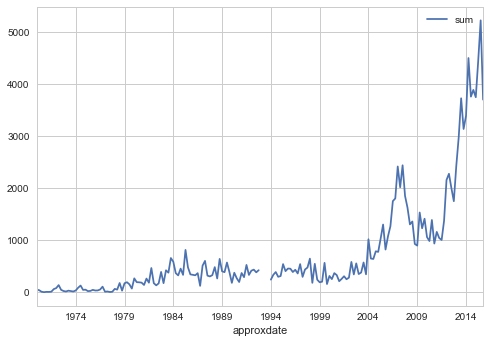

In [51]:
deadlybombs.resample('Q').sum().plot()

In [52]:
dbmonth = deadlybombs.resample('M').sum()

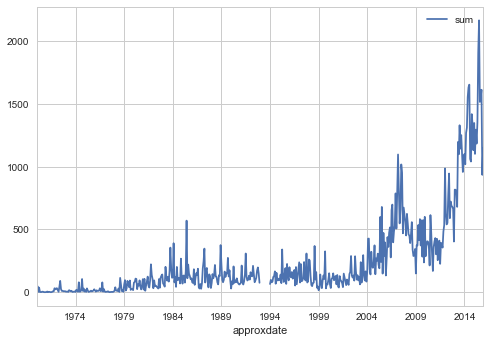

In [53]:
dbmonth.plot()

In [54]:
##Tableau Visualization showing terror attacks by country, by year:
    ## https://public.tableau.com/shared/34M3H9RCR?:display_count=yes

In [55]:
bombdata.columns

Index([u'eventid', u'approxdate', u'year', u'month', u'country',
       u'country_txt', u'region', u'region_txt', u'city', u'latitude',
       u'longitude', u'targtype1', u'targtype1_txt', u'targsubtype1',
       u'targsubtype1_txt', u'corp1', u'target1', u'natlty1', u'natlty1_txt',
       u'gname', u'weapsubtype1', u'weapsubtype1_txt', u'nkill', u'nkillter',
       u'nwound', u'nwoundte', u'propextent', u'propextent_txt',
       u'propcomment', u'addnotes', u'scite1', u'scite2', u'scite3',
       u'dbsource'],
      dtype='object')

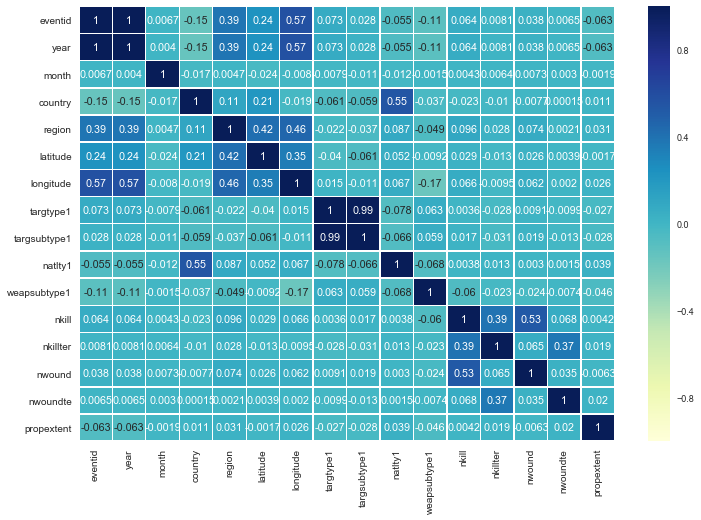

In [56]:
plt.subplots(figsize=(12, 8))
sns.set(font_scale = 0.9)
sns.heatmap(bombdata.corr(), annot = True, linewidths = 0.4,
           cmap = "YlGnBu")

In [57]:
bombdata.shape

(75963, 34)

In [58]:
EDA(bombdata)

missing values 
eventid                 0
approxdate              0
year                    0
month                   0
country                 0
country_txt             0
region                  0
region_txt              0
city                  130
latitude             1375
longitude            1375
targtype1               0
targtype1_txt           0
targsubtype1         5370
targsubtype1_txt        0
corp1               22755
target1               362
natlty1               831
natlty1_txt             0
gname                   0
weapsubtype1          497
weapsubtype1_txt        0
nkill                3710
nkillter            27553
nwound               5091
nwoundte            28101
propextent          41823
propextent_txt          0
propcomment         45344
addnotes            63796
scite1              27691
scite2              42872
scite3              56965
dbsource                0
dtype: int64 

dataframe types 
eventid                      int64
approxdate          datetime64[ns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

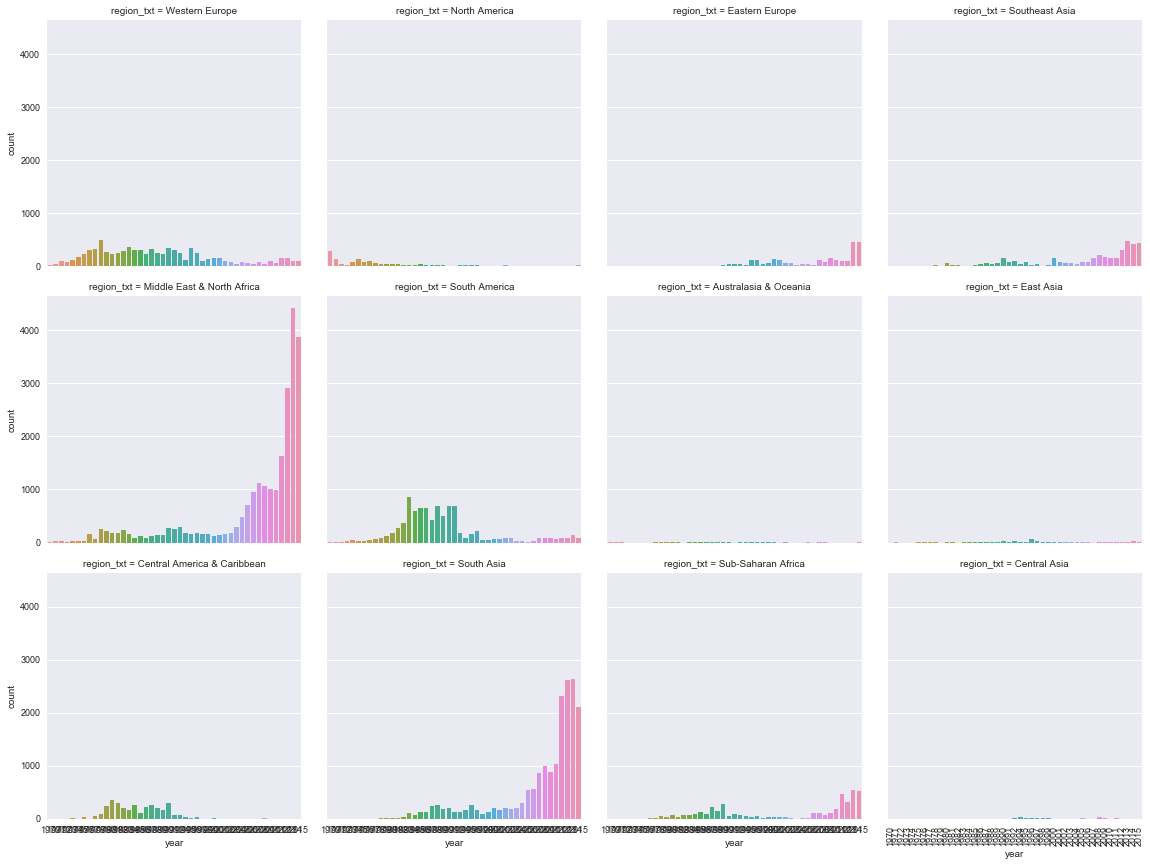

In [59]:
g = sns.factorplot(x="year", col="region_txt", 
                   data=bombdata, kind="count", col_wrap=4)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

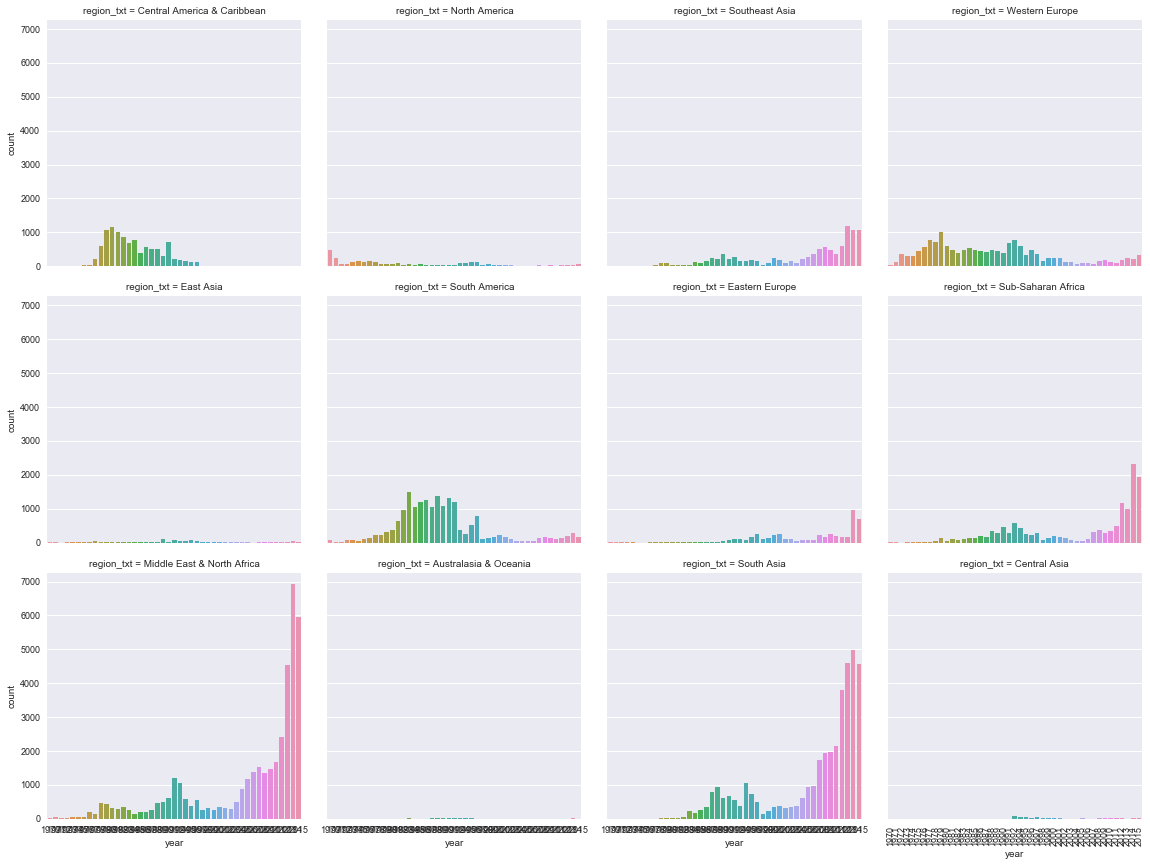

In [60]:
g = sns.factorplot(x="year", col="region_txt", 
                   data=data, kind="count", col_wrap=4)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

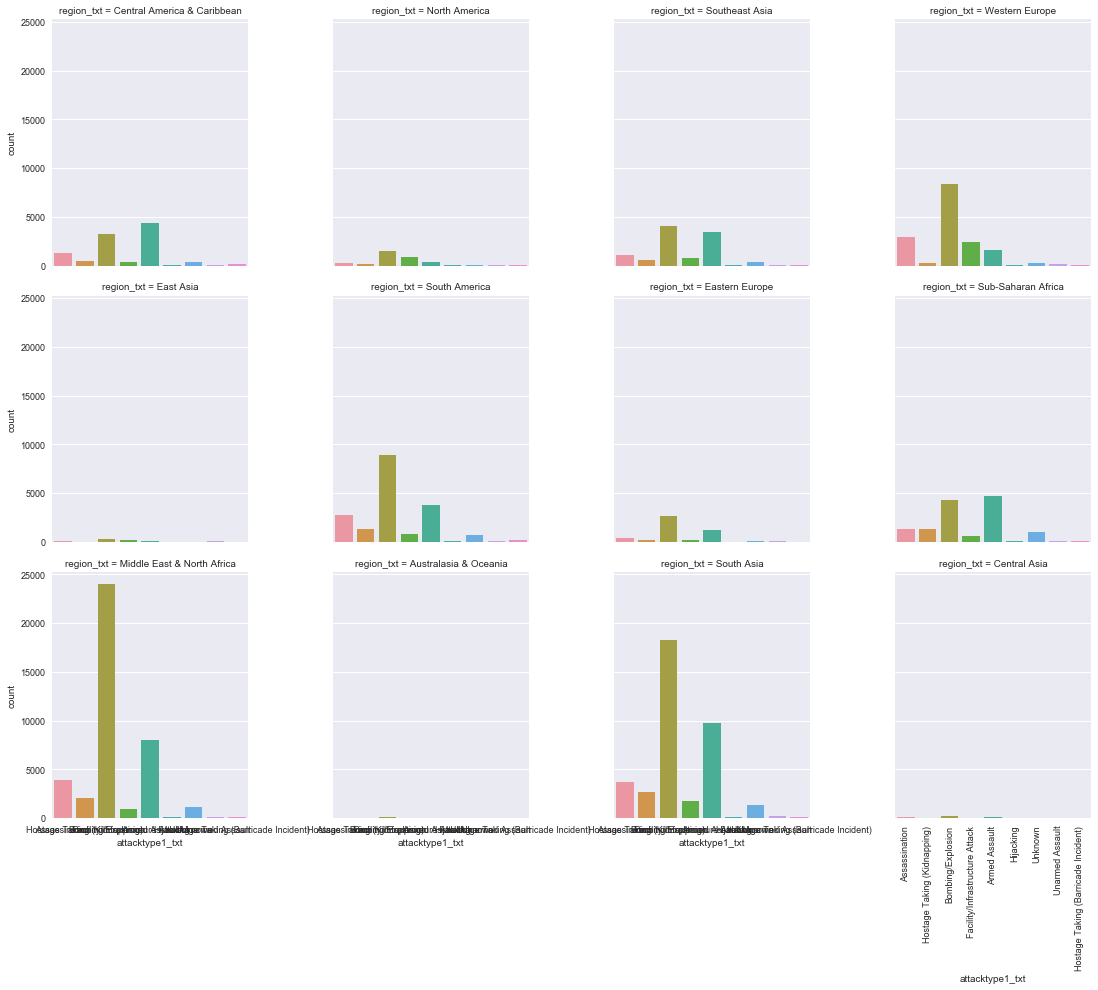

In [61]:
g = sns.factorplot(x="attacktype1_txt", col="region_txt", 
                   data=data, kind="count", col_wrap=4)

plt.xticks(rotation = 90)

In [62]:
data.groupby("region_txt").attacktype1_txt.value_counts()

region_txt                   attacktype1_txt                    
Australasia & Oceania        Bombing/Explosion                         72
                             Facility/Infrastructure Attack            52
                             Armed Assault                             47
                             Assassination                             30
                             Unknown                                   16
                             Hostage Taking (Kidnapping)               11
                             Unarmed Assault                           10
                             Hostage Taking (Barricade Incident)        5
                             Hijacking                                  3
Central America & Caribbean  Armed Assault                           4358
                             Bombing/Explosion                       3239
                             Assassination                           1252
                             Hostage Taking (Ki

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

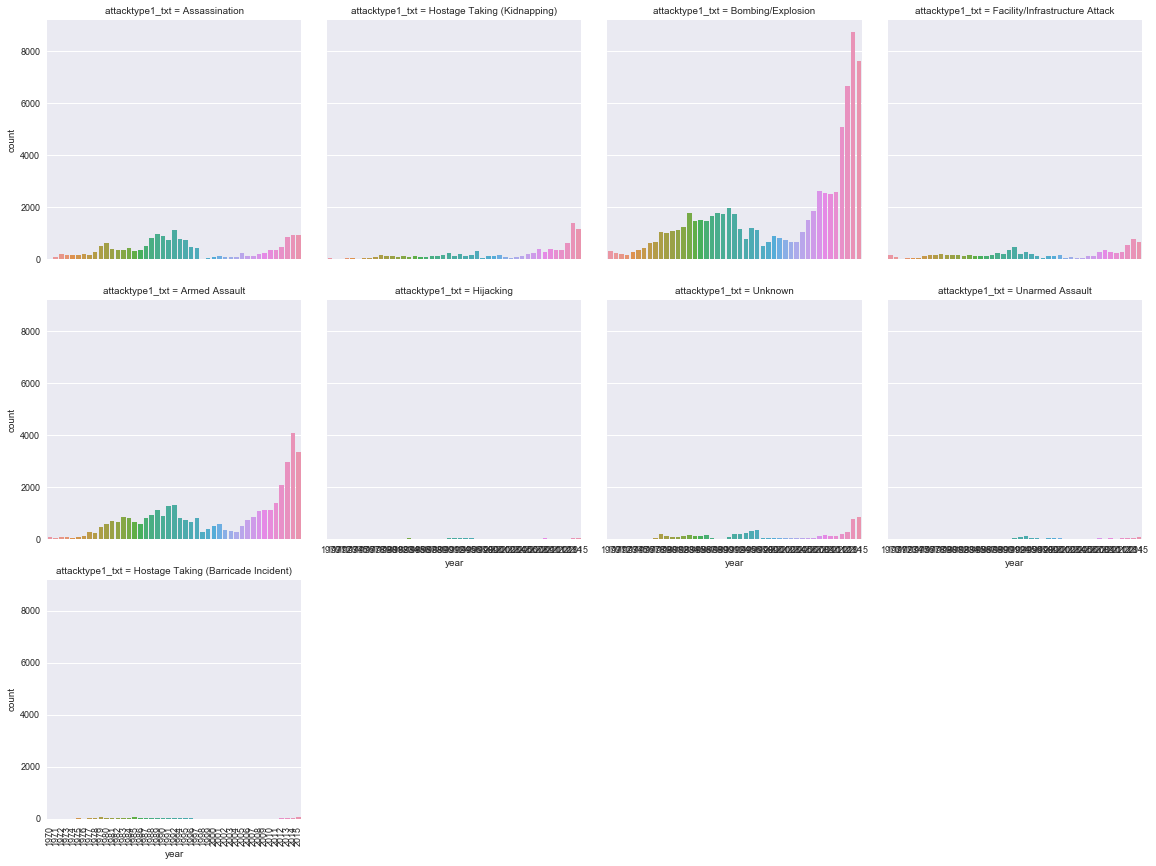

In [63]:
g = sns.factorplot(x="year", col="attacktype1_txt", 
                   data=data, kind="count", col_wrap=4)

plt.xticks(rotation = 90)

In [64]:
data.groupby("year").attacktype1_txt.value_counts()

year  attacktype1_txt                    
1970  Bombing/Explosion                       333
      Facility/Infrastructure Attack          174
      Armed Assault                            61
      Hostage Taking (Kidnapping)              38
      Assassination                            22
      Hijacking                                11
      Unknown                                   6
      Hostage Taking (Barricade Incident)       3
      Unarmed Assault                           3
1971  Bombing/Explosion                       238
      Facility/Infrastructure Attack           88
      Assassination                            70
      Armed Assault                            44
      Hostage Taking (Kidnapping)              20
      Hijacking                                 6
      Unknown                                   3
      Hostage Taking (Barricade Incident)       1
1972  Assassination                           193
      Bombing/Explosion                       186
      Ar

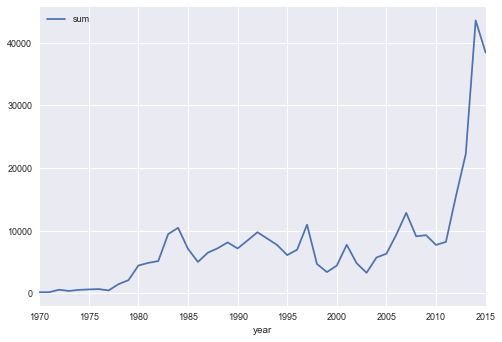

In [65]:
data.groupby("year").nkill.agg(["sum"]).plot()

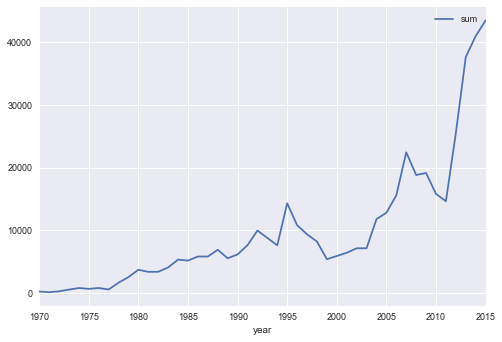

In [66]:
data.groupby("year").nwound.agg(["sum"]).plot()

## Part 3 - IMPUTING 1993

In [67]:
data["is_bombing"] = [1 if (type == 3) else 0 for type in data.attacktype1]

In [68]:
data.head()

eventid  year  month  day approxdate  extended resolution  country  \
0  197000000001  1970      2    5 1970-02-05         0        NaN       58   
1  197000000002  1970      9    6 1970-09-06         0        NaN      130   
2  197001000001  1970      1    8 1970-01-08         0        NaN      160   
3  197001000002  1970      1   14 1970-01-14         0        NaN       78   
4  197001000003  1970      1   16 1970-01-16         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America       NaN   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia       NaN   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164            1         0      NaN   
1    Mexico city  19.432608  -99.133207            1         0      NaN   
2        Unknown  15.478598  120.599741            4         0      NaN   
3         Athens  37.983773   23.728157            1         0      NaN   
4        Fukouka  33.580412  130.396361            1         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN               .   
1     NaN      1      1      1        0.0          NaN               .   
2     NaN      1      1      1        0.0          NaN               .   
3     NaN      1      1      1        0.0          NaN               .   
4     NaN      1      1      1       -9.0          NaN               .   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0         0        1        0            1                   Assassination   
1         0        1        0            6     Hostage Taking (Kidnapping)   
2         0        1        0            1                   Assassination   
3         0        1        0            3               Bombing/Explosion   
4         0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN               .          NaN               .         14   
1          NaN               .          NaN               .          7   
2          NaN               .          NaN               .         10   
3          NaN               .          NaN               .          7   
4          NaN               .          NaN               .          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN             .           NaN                .   
1             Belgium        NaN             .           NaN                .   
2       United Sta

In [69]:
data.is_bombing.value_counts() ##There is a 48% chance that an attack was a bombing 

0    80809
1    75963
Name: is_bombing, dtype: int64

In [70]:
y = data.is_bombing

In [73]:
data.corr()

eventid      year     month       day  extended   country  \
eventid         1.000000  0.999996  0.010205  0.007057  0.088933 -0.144918   
year            0.999996  1.000000  0.007585  0.006978  0.088923 -0.144894   
month           0.010205  0.007585  1.000000  0.005485  0.001372 -0.010645   
day             0.007057  0.006978  0.005485  1.000000 -0.001327  0.004825   
extended        0.088933  0.088923  0.001372 -0.001327  1.000000 -0.026851   
country        -0.144918 -0.144894 -0.010645  0.004825 -0.026851  1.000000   
region          0.391129  0.391142  0.000188  0.007371  0.032504  0.150792   
latitude        0.172221  0.172276 -0.015902  0.001397 -0.019201  0.216451   
longitude       0.553091  0.553111 -0.002390  0.008675  0.037165  0.002030   
specificity     0.029533  0.029520  0.002428 -0.007800  0.054347 -0.084609   
vicinity        0.077430  0.077450 -0.007522 -0.006319  0.017177 -0.016601   
crit1           0.000168  0.000140  0.001693  0.011041 -0.016506 -0.003257   
crit2           0.024546  0.024544  0.001159 -0.004006  0.000896 -0.040363   
crit3           0.008004  0.008009  0.000266 -0.002291  0.046728 -0.044322   
doubtterr       0.278633  0.278671 -0.012201 -0.001802  0.008817  0.043077   
alternative     0.063645  0.063702 -0.018943 -0.004179  0.090376  0.054848   
multiple        0.091466  0.091481 -0.003890 -0.003096 -0.020751 -0.026759   
success        -0.049866 -0.049852 -0.005410 -0.005132  0.065440 -0.055631   
suicide         0.134558  0.134543  0.007523  0.000833 -0.033063 -0.050038   
attacktype1     0.048222  0.048197  0.009717 -0.004886  0.268167 -0.020701   
attacktype2     0.030693  0.030941 -0.041601  0.012287  0.006901  0.039805   
attacktype3     0.054855  0.055001 -0.024191 -0.144920 -0.021069  0.091397   
targtype1       0.068833  0.068837 -0.001157 -0.000268  0.007149 -0.023511   
targsubtype1    0.047099  0.047106 -0.002147 -0.002307  0.013145 -0.021324   
natlty1        -0.023637 -0.023609 -0.009960  0.006993  0.011975  0.572763   
targtype2       0.096598  0.096492  0.028223  0.016416 -0.028854 -0.028416   
targsubtype2    0.113583  0.113482  0.025504  0.020875 -0.012712 -0.026888   
natlty2        -0.104678 -0.104635 -0.006758 -0.025942  0.041500  0.484330   
targtype3       0.149229  0.149068  0.039036 -0.054502  0.060268 -0.017009   
targsubtype3    0.081981  0.081870  0.027673 -0.039834  0.061809 -0.015717   
natlty3         0.004898  0.004864  0.008852 -0.050251  0.015257  0.412045   
ingroup         0.320870  0.320863  0.005227  0.004741  0.096260  0.043812   
ingroup2        0.467095  0.466974  0.037771  0.027022  0.035453  0.182534   
ingroup3        0.492234  0.491812  0.035673  0.023289  0.105548  0.223098   
guncertain1     0.079657  0.079675 -0.006712 -0.001641  0.039100 -0.016782   
guncertain2    -0.056744 -0.056589 -0.045888  0.011782 -0.077274 -0.017398   
guncertain3    -0.137790 -0.137356 -0.084985 -0.118670 -0.169880 -0.282162   
nperps         -0.137350 -0.137413  0.016581 -0.015820 -0.003213 -0.002085   
nperpcap        0.473824  0.473655  0.035928  0.005552  0.017236 -0.069664   
claimed         0.126256  0.126134  0.026994  0.003392  0.005034 -0.012140   
claimmode       0.115381  0.115327  0.024605  0.000449  0.053912 -0.128221   
claim2          0.030646  0.031130 -0.096113 -0.042107 -0.207015  0.033483   
claimmode2      0.124254  0.124085  0.017931  0.035093  0.030452 -0.082198   
claim3         -0.417761 -0.417771  0.029200  0.131652 -0.057406  0.157317   
claimmode3      0.082421  0.082659 -0.082247  0.043476 -0.062390  0.103578   
compclaim       0.272146  0.271551  0.133230  0.031835  0.061214  0.002878   
weaptype1      -0.038496 -0.038523  0.009847  0.001501  0.201390 -0.021702   
weapsubtype1    0.100979  0.100967  0.004606  0.008442 -0.114555 -0.040641   
weaptype2       0.049107  0.049068  0.010822  0.021216  0.150400 -0.008422   
weapsubtype2    0.029094  0.029045  0.013472 -0.005620  0.138510 -0.023695   
weaptype3       0.050598  0.050625 -0.0

In [74]:
tsdf = data[["approxdate", "is_bombing"]]

In [77]:
tsdf2 = tsdf.groupby("approxdate").is_bombing.agg(["sum"])

In [78]:
tsdf2.head()

sum
approxdate     
1970-01-01    1
1970-01-02    1
1970-01-03    0
1970-01-06    0
1970-01-08    0

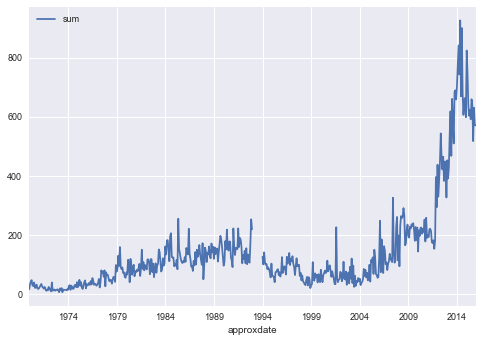

In [79]:
tsdf2.resample("M").sum().plot()

In [80]:
tsdf2.shape

(15377, 1)

In [88]:
tsdf2["sum"].resample("M").sum().autocorr(lag=12)

0.88878939261556356

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=90,center=True).mean()
  if __name__ == '__main__':


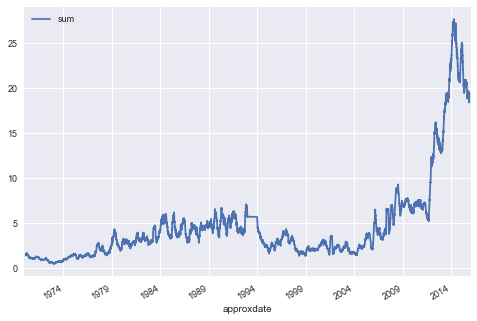

In [92]:
pd.rolling_mean(tsdf2, window=90, center=True).plot()

In [94]:
tsdf2["change_in_numattacks"] = tsdf2["sum"].diff(periods = 1)

In [97]:
tsdf2

sum  change_in_numattacks
approxdate                           
1970-01-01    1                   NaN
1970-01-02    1                   0.0
1970-01-03    0                  -1.0
1970-01-06    0                   0.0
1970-01-08    0                   0.0
1970-01-09    0                   0.0
1970-01-10    1                   1.0
1970-01-11    0                  -1.0
1970-01-12    2                   2.0
1970-01-13    0                  -2.0
1970-01-14    1                   1.0
1970-01-15    0                  -1.0
1970-01-16    0                   0.0
1970-01-19    2                   2.0
1970-01-20    0                  -2.0
1970-01-21    1                   1.0
1970-01-22    1                   0.0
1970-01-25    0                  -1.0
1970-01-26    1                   1.0
1970-01-27    0                  -1.0
1970-01-28    1                   1.0
1970-01-30    2                   1.0
1970-01-31    1                  -1.0
1970-02-01    0                  -1.0
1970-02-02    0                   0.0
1970-02-03    0                   0.0
1970-02-04    1                   1.0
1970-02-05    0                  -1.0
1970-02-06    3                   3.0
1970-02-07    0                  -3.0
1970-02-08    2                   2.0
1970-02-09    2                   0.0
1970-02-10    0                  -2.0
1970-02-11    0                   0.0
1970-02-13    2                   2.0
1970-02-15    1                  -1.0
1970-02-16    3                   2.0
1970-02-17    4                   1.0
1970-02-18    2                  -2.0
1970-02-20    1                  -1.0
1970-02-21    3                   2.0
1970-02-22    1                  -2.0
1970-02-23    5                   4.0
1970-02-24    1                  -4.0
1970-02-27    1                   0.0
1970-02-28    0                  -1.0
1970-03-01    3                   3.0
1970-03-02    0                  -3.0
1970-03-03    2                   2.0
1970-03-04    3                   1.0
1970-03-05    2                  -1.0
1970-03-06    2                   0.0
1970-03-09    2                   0.0
1970-03-10    2                   0.0
1970-03-11    0                  -2.0
1970-03-12    5                   5.0
1970-03-13    1                  -4.0
1970-03-14    2                   1.0
1970-03-15    2                   0.0
1970-03-16    0                  -2.0
1970-03-17    1                   1.0
1970-03-18    1                   0.0
1970-03-20    1                   0.0
1970-03-21    1                   0.0
1970-03-22    3                   2.0
1970-03-23    1                  -2.0
1970-03-24    3                   2.0
1970-03-27    1                  -2.0
1970-03-29    1                   0.0
1970-03-30    0                  -1.0
...         ...                   ...
2015-10-23   27                  16.0
2015-10-24   13                 -14.0
2015-10-25   21                   8.0
2015-10-26   15                  -6.0
2015-10-27   24                   9.0
2015-10-28   21                  -3.0
2015-10-29   33                  12.0
2015-10-30   22                 -11.0
2015-10-31   23                   1.0
2015-11-01   24                   1.0
2015-11-02   15                  -9.0
2015-11-03   14                  -1.0
2015-11-04   13                  -1.0
2015-11-05   23                  10.0
2015-11-06   17                  -6.0
2015-11-07   15                  -2.0
2015-11-08   21                   6.0
2015-11-09   28                   7.0
2015-11-10   26                  -2.0
2015-11-11   19                  -7.0
2015-11-12   12                  -7.0
2015-11-13   33                  21.0
2015-11-14   26                  -7.0
2015-11-15   24                  -2.0
2015-11-16   15                  -9.0
2015-11-17   13                  -2.0
2015-11-18   19                   6.0
2015-11-19   21                   2.0
2015-11-20   17                  -4.0
2015-11-21   23                   6.0
2015-11-22   13                 -10.0
2015-11-23   28                  15.0
2015-11-24   22       

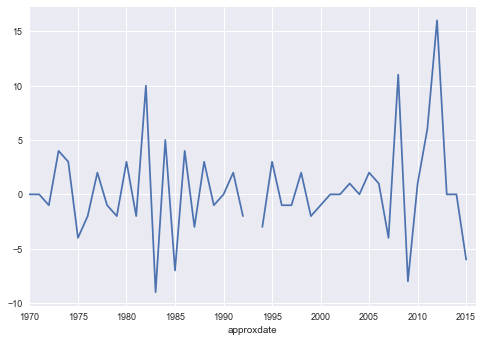

In [106]:
tsdf2.change_in_numattacks.resample("BA").sum().plot()

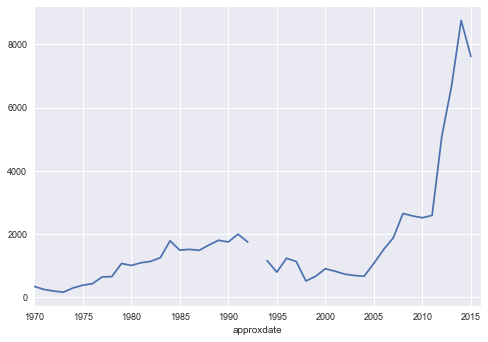

In [107]:
tsdf2["sum"].resample("BA").sum().plot()

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [116]:
bombsperyear = tsdf2[["sum"]].resample("A").sum()

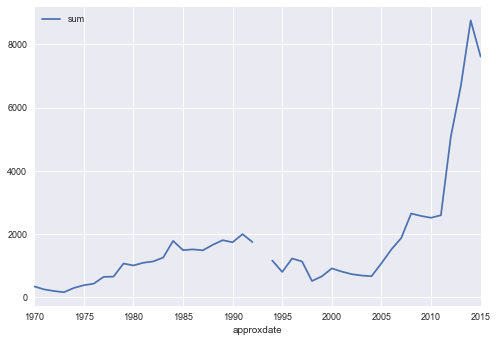

In [117]:
bombsperyear.plot()

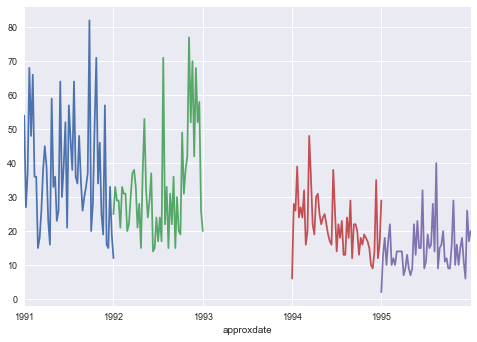

In [148]:
tsdf2["1991"]["sum"].resample("W").sum().plot()
tsdf2["1992"]["sum"].resample("W").sum().plot()
tsdf2["1994"]["sum"].resample("W").sum().plot()
tsdf2["1995"]["sum"].resample("W").sum().plot()
plt.show()

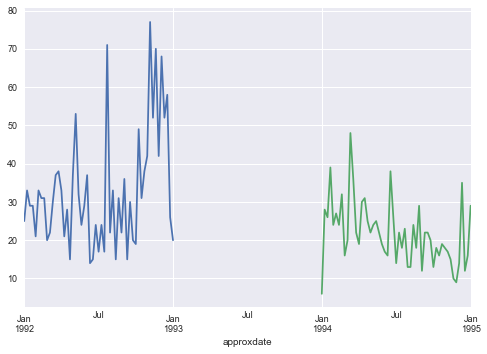

In [149]:
tsdf2["1992"]["sum"].resample("W").sum().plot()
tsdf2["1994"]["sum"].resample("W").sum().plot()
plt.show()

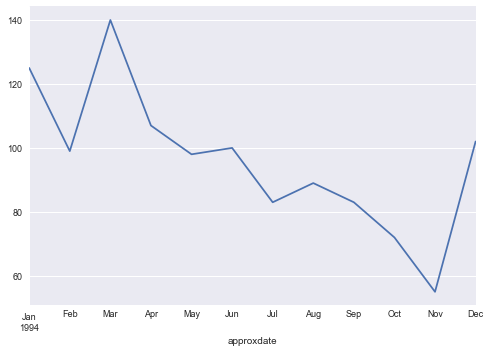

In [171]:
tsdf2["1994" or "1995"]["sum"].resample("M").sum().plot()

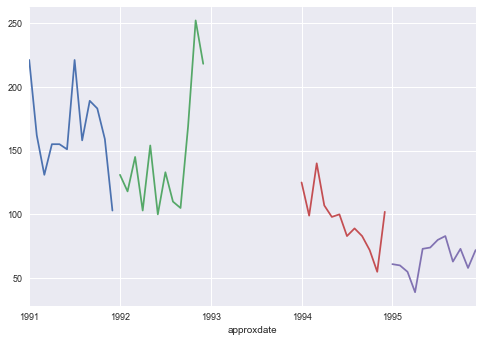

In [150]:
tsdf2["1991"]["sum"].resample("M").sum().plot()
tsdf2["1992"]["sum"].resample("M").sum().plot()
tsdf2["1994"]["sum"].resample("M").sum().plot()
tsdf2["1995"]["sum"].resample("M").sum().plot()
plt.show()

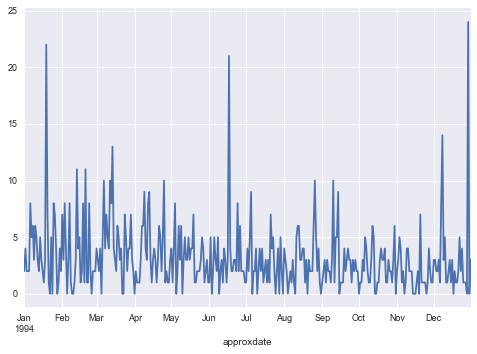

In [145]:
tsdf2["1994"]["sum"].plot()

In [181]:
pizza = tsdf2.loc["1991":"1995",:]

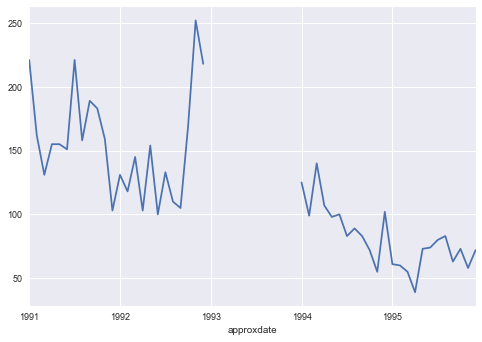

In [185]:
pizza["sum"].resample("M").sum().plot()


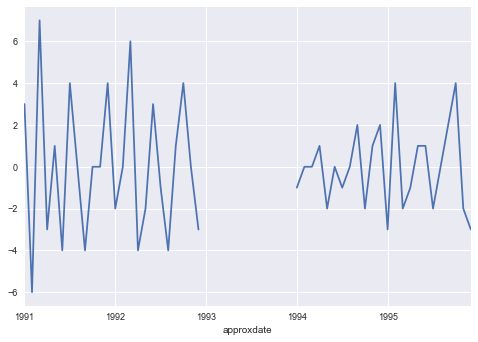

In [183]:
pizza["change_in_numattacks"].resample("M").sum().plot()

In [197]:
pizza1 = tsdf2.loc["1970":"1992",:]
pizza2 = tsdf2.loc["1994":"2015",:]

In [198]:
pizza1["sum"].resample("M").sum().autocorr(lag = 12)

0.76047781547228566

In [199]:
pizza2["sum"].resample("M").sum().autocorr(lag = -12)

0.88503075768447148

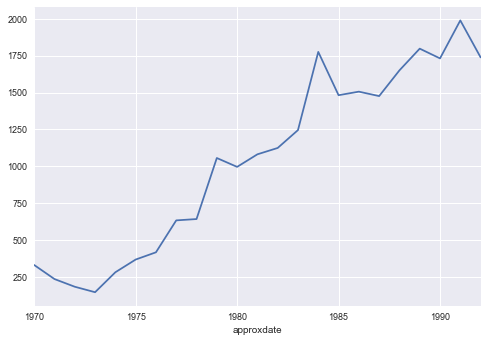

In [203]:
pizza1["sum"].resample("A").sum().plot()

In [201]:
pizza1["sum"].resample("A").sum().autocorr(lag = 1)

0.95255326438331178

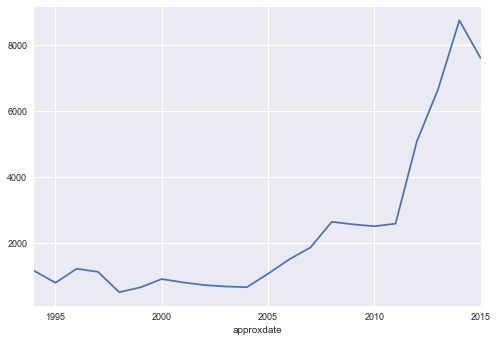

In [204]:
pizza2["sum"].resample("A").sum().plot()

In [202]:
pizza2["sum"].resample("A").sum().autocorr(lag = -1)

0.94126076572961992

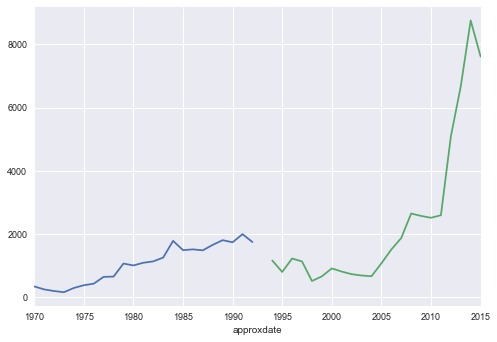

In [205]:
pizza1["sum"].resample("A").sum().plot()
pizza2["sum"].resample("A").sum().plot()
plt.show()

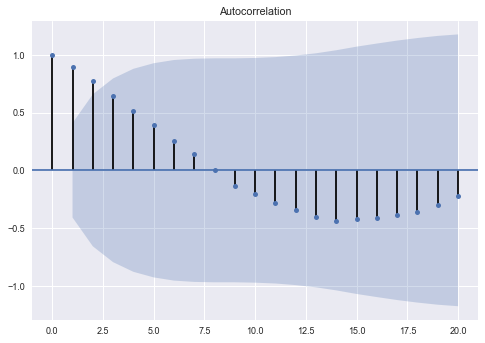

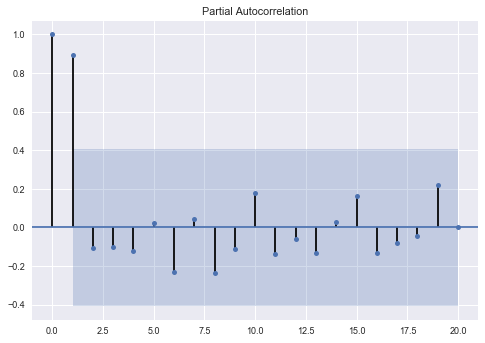

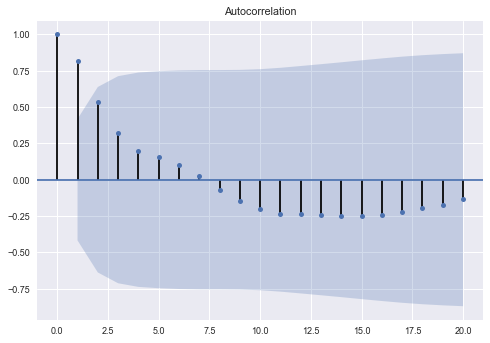

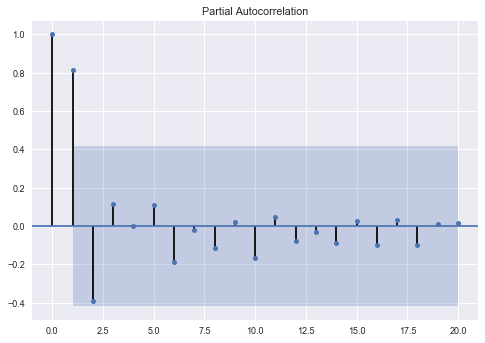

In [212]:
plot_acf(pizza1["sum"].resample("A").sum(), lags = 20)
plot_pacf(pizza1["sum"].resample("A").sum(), lags = 20)
plot_acf(pizza2["sum"].resample("A").sum(), lags = 20)
plot_pacf(pizza2["sum"].resample("A").sum(), lags = 20)



plt.show()

In [211]:
##use two-year periods for prediction

In [232]:
oldpizza = pizza1[["sum"]].resample("A").sum().astype(float)

In [299]:
newpizza = pizza2[["sum"]].resample("A").sum().astype(float)

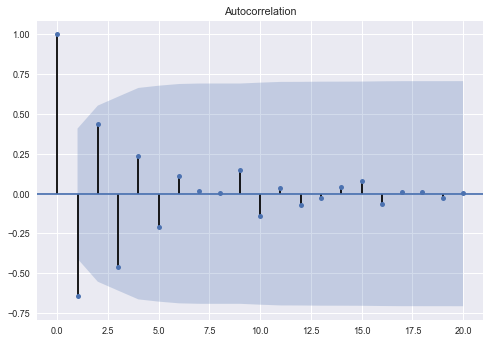

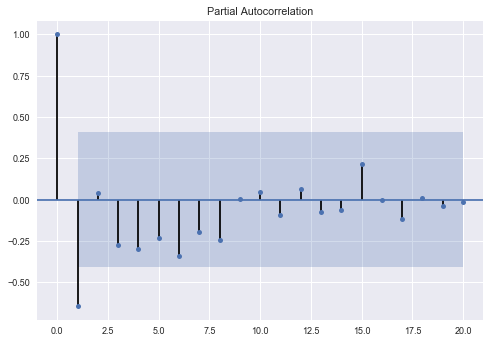

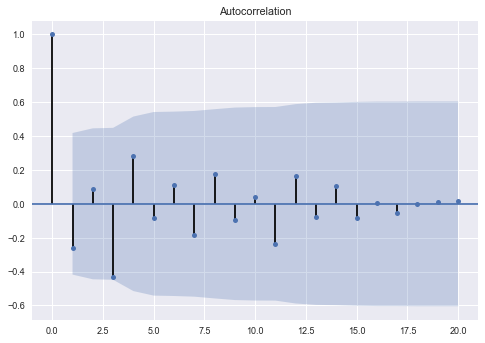

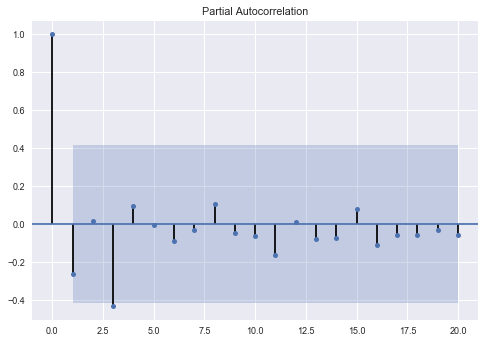

In [219]:
plot_acf(pizza1["change_in_numattacks"].resample("A").sum(), lags = 20)
plot_pacf(pizza1["change_in_numattacks"].resample("A").sum(), lags = 20)
plot_acf(pizza2["change_in_numattacks"].resample("A").sum(), lags = 20)
plot_pacf(pizza2["change_in_numattacks"].resample("A").sum(), lags = 20)



plt.show()

In [250]:
from statsmodels.tsa.arima_model import ARMA, AR

In [267]:
ovalues = oldpizza['sum'].values
odates = oldpizza.index

In [278]:
model = ARMA(oldpizza, (2,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    sum   No. Observations:                   23
Model:                     ARMA(2, 0)   Log Likelihood                -154.654
Method:                       css-mle   S.D. of innovations            190.399
Date:                Wed, 10 May 2017   AIC                            317.308
Time:                        19:18:58   BIC                            321.850
Sample:                    12-31-1970   HQIC                           318.450
                         - 12-31-1992                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1044.9193    589.356      1.773      0.091    -110.196    2200.035
ar.L1.sum      0.8015      0.211      3.798      0.001       0.388       1.215
ar.L2.sum      0.1643      0.218      0.752      0.461      -0.264       0.592
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0302           +0.0000j            1.0302            0.0000
AR.2           -5.9088           +0.0000j            5.9088            0.5000
-----------------------------------------------------------------------------
"""

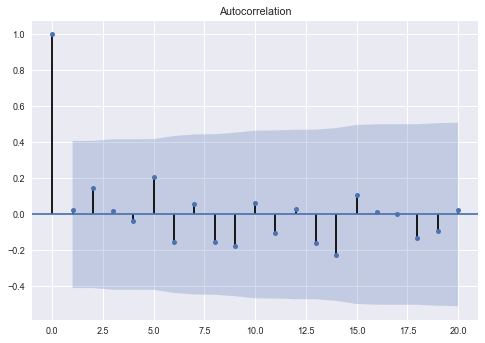

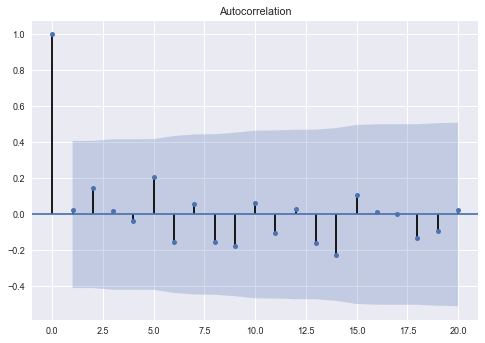

In [279]:
plot_acf(model.resid, lags=20)

In [310]:
model.predict()

1970-12-31    1044.919285
1971-12-31     362.179502
1972-12-31     281.246659
1973-12-31     223.963769
1974-12-31     185.766941
1975-12-31     287.886364
1976-12-31     378.990314
1977-12-31     432.390280
1978-12-31     613.556558
1979-12-31     656.254438
1980-12-31     988.738146
1981-12-31    1008.498271
1982-12-31    1066.765965
1983-12-31    1115.192858
1984-12-31    1219.234244
1985-12-31    1663.087400
1986-12-31    1515.162698
1987-12-31    1486.263539
1988-12-31    1466.162323
1989-12-31    1600.688860
1990-12-31    1747.089153
1991-12-31    1718.341746
1992-12-31    1913.475790
Freq: A-DEC, dtype: float64

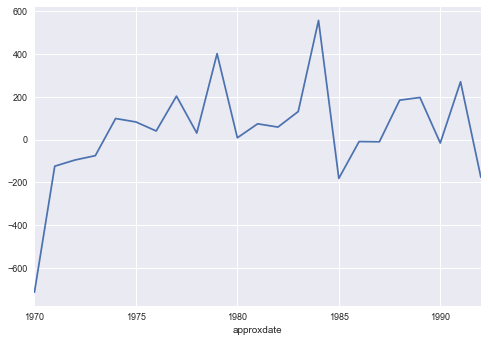

In [281]:
model.resid.plot()

In [301]:
newpizza.sort_index(ascending = False, inplace = True)

In [303]:
newpizza.head()

sum
approxdate        
2015-12-31  7615.0
2014-12-31  8759.0
2013-12-31  6669.0
2012-12-31  5080.0
2011-12-31  2587.0

In [312]:
model2 = ARMA(newpizza, (2,0)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    sum   No. Observations:                   22
Model:                     ARMA(2, 0)   Log Likelihood                -179.408
Method:                       css-mle   S.D. of innovations            795.479
Date:                Wed, 10 May 2017   AIC                            366.815
Time:                        19:30:37   BIC                            371.179
Sample:                    12-31-2015   HQIC                           367.843
                         - 12-31-1994                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2701.8743   1403.476      1.925      0.069     -48.888    5452.636
ar.L1.sum      1.3925      0.205      6.790      0.000       0.991       1.794
ar.L2.sum     -0.5089      0.254     -2.006      0.059      -1.006      -0.012
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3683           -0.3049j            1.4019           -0.0349
AR.2            1.3683           +0.3049j            1.4019            0.0349
-----------------------------------------------------------------------------
"""

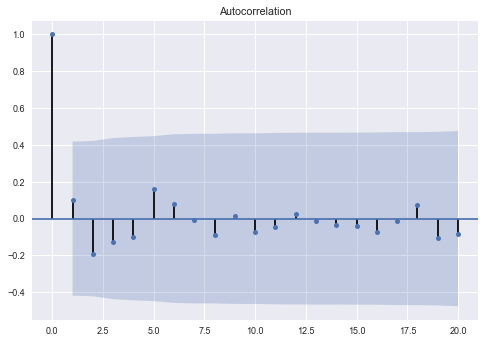

In [313]:
plot_acf(model2.resid, lags=20)
plt.show()

In [328]:
model.resid

approxdate
1970-12-31   -711.919285
1971-12-31   -124.179502
1972-12-31    -95.246659
1973-12-31    -74.963769
1974-12-31     98.233059
1975-12-31     82.113636
1976-12-31     40.009686
1977-12-31    202.609720
1978-12-31     30.443442
1979-12-31    400.745562
1980-12-31      8.261854
1981-12-31     73.501729
1982-12-31     58.234035
1983-12-31    130.807142
1984-12-31    555.765756
1985-12-31   -181.087400
1986-12-31     -9.162698
1987-12-31    -10.263539
1988-12-31    183.837677
1989-12-31    196.311140
1990-12-31    -16.089153
1991-12-31    269.658254
1992-12-31   -175.475790
Freq: A-DEC, dtype: float64

In [327]:
model2.resid

approxdate
2015-12-31    4913.125727
2014-12-31    1522.791896
2013-12-31   -1967.504776
2012-12-31     -64.006655
2011-12-31   -1407.788737
2010-12-31    1175.204115
2009-12-31      76.038538
2008-12-31      31.564102
2007-12-31    -823.146720
2006-12-31     -64.975259
2005-12-31    -392.867437
2004-12-31    -376.655820
2003-12-31      -6.991231
2002-12-31    -204.139604
2001-12-31    -171.314476
2000-12-31    -160.228163
1999-12-31    -513.048454
1998-12-31    -258.229941
1997-12-31     438.632732
1996-12-31    -404.648667
1995-12-31    -646.566548
1994-12-31     356.480042
Freq: -1A-DEC, dtype: float64

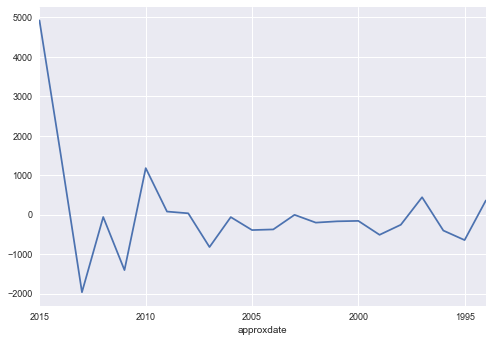

In [309]:
model2.resid.plot()

In [338]:
tsdf2.head()

sum  change_in_numattacks
approxdate                           
1970-01-01    1                   NaN
1970-01-02    1                   0.0
1970-01-03    0                  -1.0
1970-01-06    0                   0.0
1970-01-08    0                   0.0

In [341]:
tsdf.head()

approxdate  is_bombing
0 1970-02-05           0
1 1970-09-06           0
2 1970-01-08           0
3 1970-01-14           1
4 1970-01-16           0

In [ ]:
#tsdf2 = tsdf.groupby("approxdate").is_bombing.agg(["sum"])

In [342]:
#tsdf2["yearmonth"] = tsdf2.index.resample("M")

In [ ]:
#df['mnth_yr'] = df['date_column'].apply(lambda x: x.strftime('%B-%Y'))     

In [345]:
tsdf["yearmonth"] = tsdf.approxdate.apply(lambda x: x.strftime("%B-%Y"))

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [348]:
tsdf["yearmonth"] = pd.to_datetime(tsdf.yearmonth)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [350]:
tsdf.dtypes

approxdate    datetime64[ns]
is_bombing             int64
yearmonth     datetime64[ns]
dtype: object

In [351]:
tsdf3 = tsdf.groupby("yearmonth").is_bombing.agg(["sum"])

In [355]:
tsdf2.resample("M").sum()

sum  change_in_numattacks
approxdate                             
1970-01-31   15.0                   0.0
1970-02-28   32.0                  -1.0
1970-03-31   41.0                   2.0
1970-04-30   46.0                  -1.0
1970-05-31   28.0                   0.0
1970-06-30   26.0                  -1.0
1970-07-31   38.0                   0.0
1970-08-31   20.0                   1.0
1970-09-30   20.0                  -1.0
1970-10-31   31.0                   4.0
1970-11-30   20.0                  -4.0
1970-12-31   16.0                   1.0
1971-01-31   18.0                   3.0
1971-02-28   23.0                  -2.0
1971-03-31   28.0                  -2.0
1971-04-30   33.0                   1.0
1971-05-31   24.0                  -1.0
1971-06-30   21.0                   1.0
1971-07-31   17.0                   0.0
1971-08-31   23.0                   0.0
1971-09-30   16.0                  -1.0
1971-10-31   10.0                   0.0
1971-11-30   14.0                   1.0
1971-12-31   11.0                   0.0
1972-01-31   23.0                   0.0
1972-02-29   14.0                  -1.0
1972-03-31   16.0                   1.0
1972-04-30    8.0                  -1.0
1972-05-31   38.0                   4.0
1972-06-30   10.0                  -4.0
1972-07-31   13.0                   1.0
1972-08-31   14.0                  -1.0
1972-09-30   10.0                   1.0
1972-10-31   12.0                   0.0
1972-11-30   13.0                  -1.0
1972-12-31   15.0                   0.0
1973-01-31   10.0                   0.0
1973-02-28    5.0                   0.0
1973-03-31   18.0                   1.0
1973-04-30   12.0                   1.0
1973-05-31   19.0                   0.0
1973-06-30    5.0                  -2.0
1973-07-31   14.0                   1.0
1973-08-31   13.0                   0.0
1973-09-30   13.0                  -1.0
1973-10-31   13.0                   0.0
1973-11-30   12.0                   0.0
1973-12-31   15.0                   4.0
1974-01-31   13.0                  -4.0
1974-02-28   26.0                   1.0
1974-03-31   29.0                  -1.0
1974-04-30   13.0                   1.0
1974-05-31   27.0                   1.0
1974-06-30   23.0                  -2.0
1974-07-31   16.0                   0.0
1974-08-31   18.0                   1.0
1974-09-30   29.0                  -1.0
1974-10-31   29.0                   1.0
1974-11-30   22.0                  -1.0
1974-12-31   39.0                   7.0
1975-01-31   22.0                  -7.0
1975-02-28   36.0                   1.0
1975-03-31   47.0                   2.0
1975-04-30   27.0                  -1.0
1975-05-31   39.0                   0.0
1975-06-30   20.0                  -2.0
1975-07-31   16.0                   1.0
1975-08-31   28.0                  -1.0
1975-09-30   39.0                   1.0
1975-10-31   45.0                   1.0
...           ...                   ...
2010-03-31  196.0                  -4.0
2010-04-30  223.0                  -1.0
2010-05-31  224.0                  -1.0
2010-06-30  203.0                   6.0
2010-07-31  220.0                  -7.0
2010-08-31  209.0                   0.0
2010-09-30  251.0                   7.0
2010-10-31  177.0                  -5.0
2010-11-30  257.0                   4.0
2010-12-31  189.0                  -4.0
2011-01-31  199.0                   5.0
2011-02-28  192.0                  -5.0
2011-03-31  218.0                   5.0
2011-04-30  220.0                  -9.0
2011-05-31  211.0                   6.0
2011-06-30  175.0                   2.0
2011-07-31  171.0                  -4.0
2011-08-31  181.0                  -3.0
2011-09-30  152.0                   4.0
2011-10-31  180.0                   0.0
2011-11-30  395.0                   1.0
2011-12-31  293.0                  -2.0
2012-01-31  437.0                   4.0
2012-02-29  329.0                   5.0
2012-03-31  384.0                   4.0
2012-04-30  445.0                   4.0
2012-05-31  543.0                  -3.0
2012-06-30  46

In [356]:
tsdf3["sum"] = tsdf3["sum"].astype(float)

In [358]:
tsdf3["change"] = tsdf3["sum"].diff(periods = 1)

In [359]:
tsdf3.head()

sum  change
yearmonth               
1970-01-01  15.0     NaN
1970-02-01  32.0    17.0
1970-03-01  41.0     9.0
1970-04-01  46.0     5.0
1970-05-01  28.0   -18.0

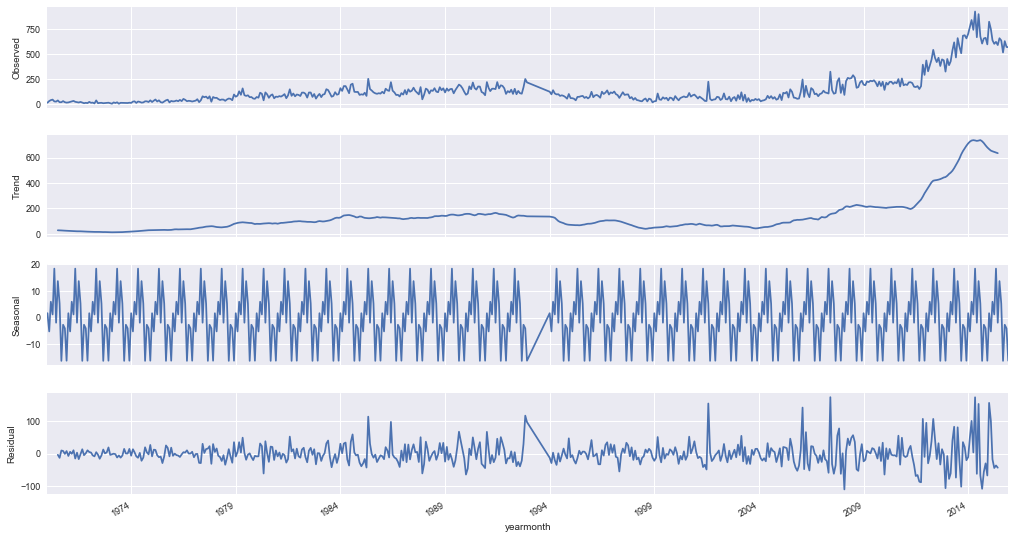

In [360]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsdf3["sum"], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

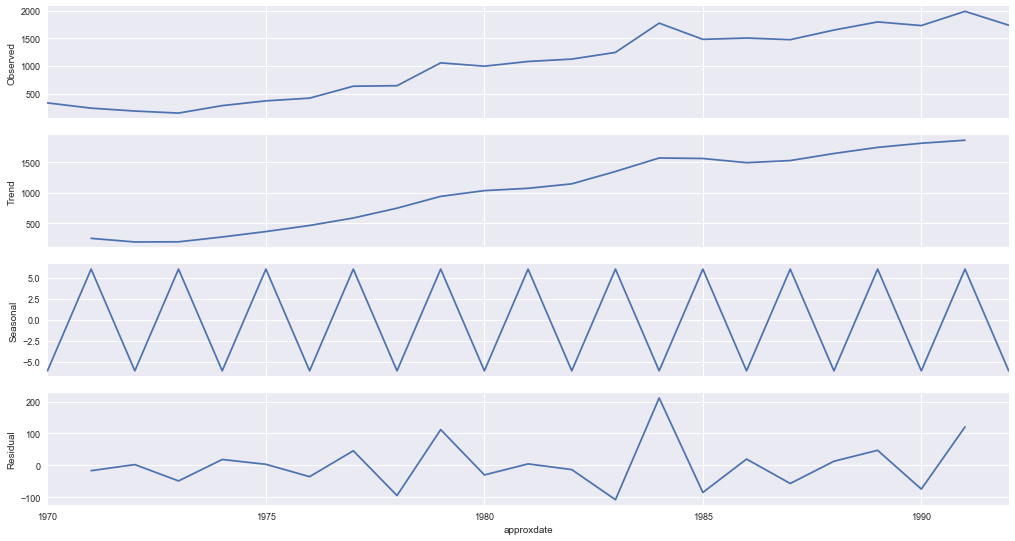

In [369]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(oldpizza["sum"], freq=2)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

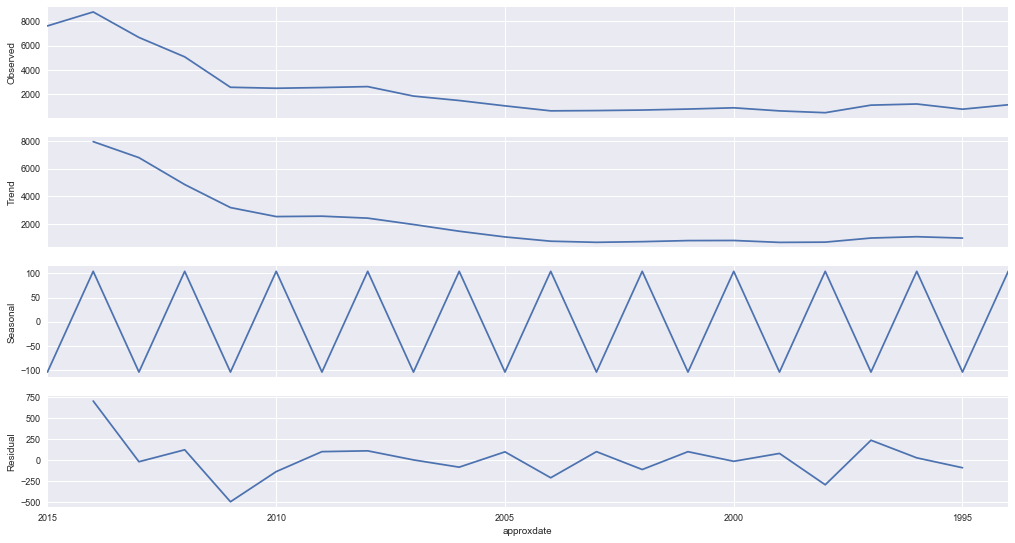

In [370]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(newpizza["sum"], freq=2)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

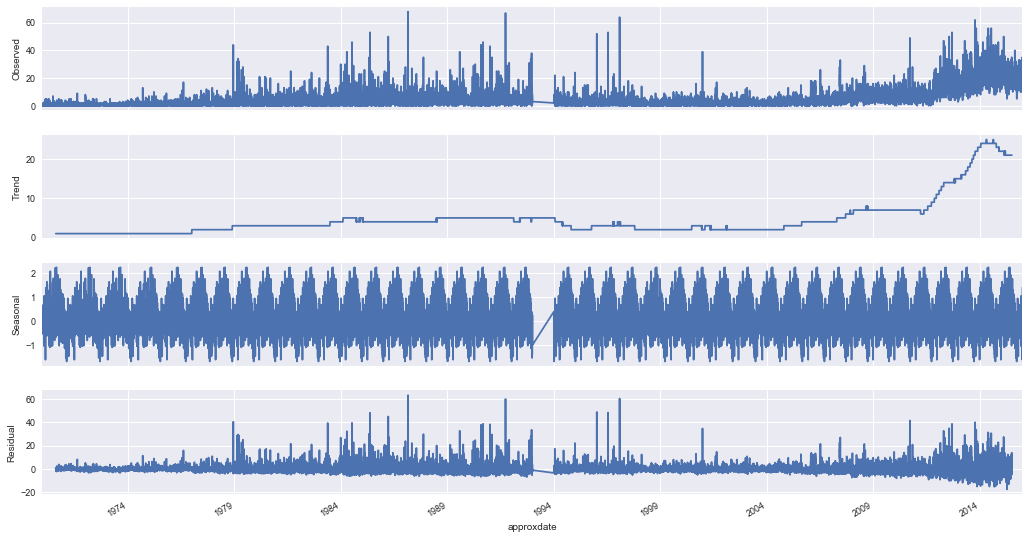

In [373]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsdf2["sum"], freq=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [374]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


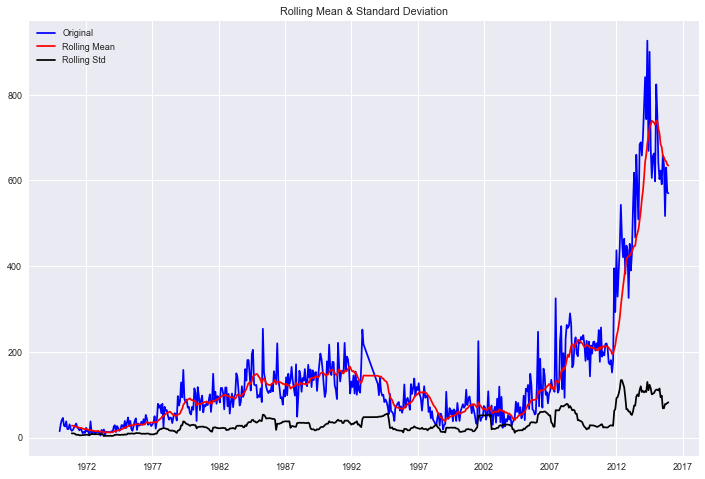

Results of Dickey-Fuller Test:
Test Statistic                   0.445415
p-value                          0.983116
#Lags Used                      11.000000
Number of Observations Used    528.000000
Critical Value (5%)             -2.867030
Critical Value (1%)             -3.442796
Critical Value (10%)            -2.569694
dtype: float64


In [375]:
test_stationarity(tsdf3["sum"])

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


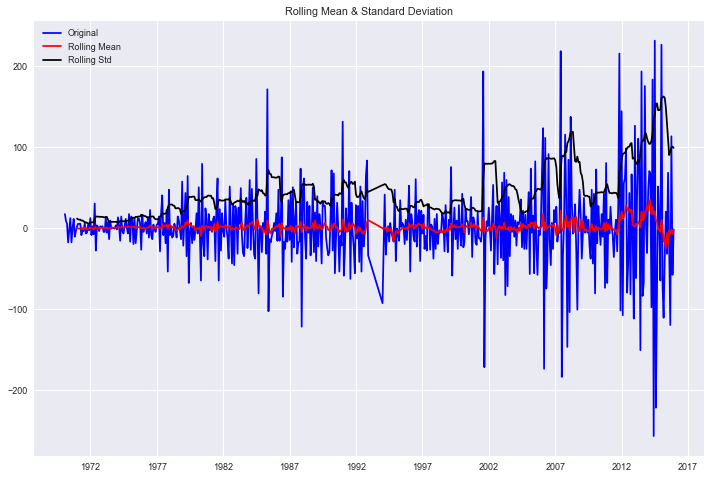

Results of Dickey-Fuller Test:
Test Statistic                -7.339097e+00
p-value                        1.076937e-10
#Lags Used                     1.100000e+01
Number of Observations Used    5.270000e+02
Critical Value (5%)           -2.867040e+00
Critical Value (1%)           -3.442820e+00
Critical Value (10%)          -2.569699e+00
dtype: float64


In [377]:
test_stationarity(tsdf3.change.dropna(inplace=False))

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


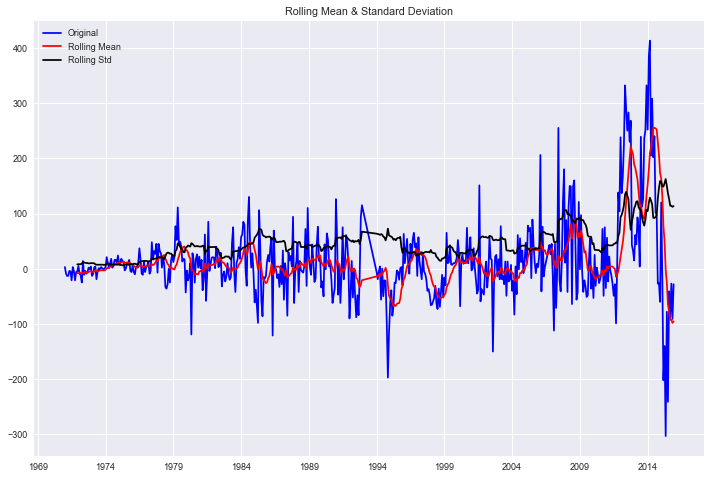

Results of Dickey-Fuller Test:
Test Statistic                  -3.533627
p-value                          0.007164
#Lags Used                      15.000000
Number of Observations Used    512.000000
Critical Value (5%)             -2.867202
Critical Value (1%)             -3.443187
Critical Value (10%)            -2.569785
dtype: float64


In [378]:
tsdf3["SAD"] = tsdf3["sum"] - tsdf3["sum"].shift(12)  
test_stationarity(tsdf3["SAD"].dropna(inplace=False))

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


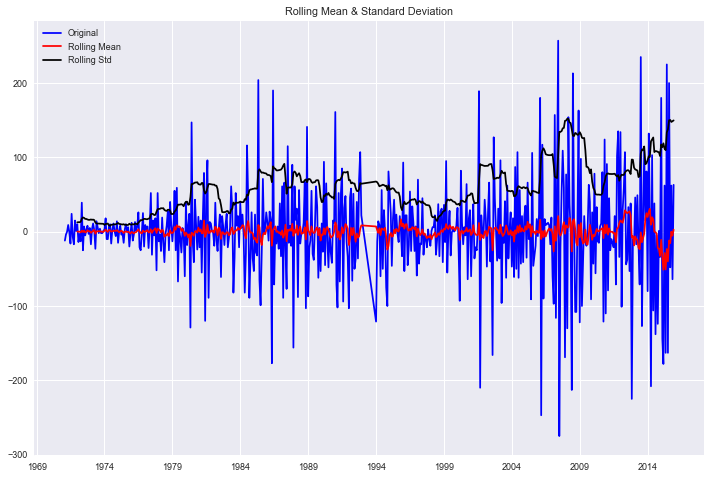

Results of Dickey-Fuller Test:
Test Statistic                -7.874770e+00
p-value                        4.877171e-12
#Lags Used                     1.900000e+01
Number of Observations Used    5.070000e+02
Critical Value (5%)           -2.867258e+00
Critical Value (1%)           -3.443314e+00
Critical Value (10%)          -2.569815e+00
dtype: float64


In [379]:
tsdf3["SADchange"] = tsdf3.change - tsdf3.change.shift(12)  
test_stationarity(tsdf3.SADchange.dropna(inplace=False))

In [383]:
tsdf3.head(30)

sum  change   SAD  SADchange
yearmonth                                
1970-01-01  15.0     NaN   NaN        NaN
1970-02-01  32.0    17.0   NaN        NaN
1970-03-01  41.0     9.0   NaN        NaN
1970-04-01  46.0     5.0   NaN        NaN
1970-05-01  28.0   -18.0   NaN        NaN
1970-06-01  26.0    -2.0   NaN        NaN
1970-07-01  38.0    12.0   NaN        NaN
1970-08-01  20.0   -18.0   NaN        NaN
1970-09-01  20.0     0.0   NaN        NaN
1970-10-01  31.0    11.0   NaN        NaN
1970-11-01  20.0   -11.0   NaN        NaN
1970-12-01  16.0    -4.0   NaN        NaN
1971-01-01  18.0     2.0   3.0        NaN
1971-02-01  23.0     5.0  -9.0      -12.0
1971-03-01  28.0     5.0 -13.0       -4.0
1971-04-01  33.0     5.0 -13.0        0.0
1971-05-01  24.0    -9.0  -4.0        9.0
1971-06-01  21.0    -3.0  -5.0       -1.0
1971-07-01  17.0    -4.0 -21.0      -16.0
1971-08-01  23.0     6.0   3.0       24.0
1971-09-01  16.0    -7.0  -4.0       -7.0
1971-10-01  10.0    -6.0 -21.0      -17.0
1971-11-01  14.0     4.0  -6.0       15.0
1971-12-01  11.0    -3.0  -5.0        1.0
1972-01-01  23.0    12.0   5.0       10.0
1972-02-01  14.0    -9.0  -9.0      -14.0
1972-03-01  16.0     2.0 -12.0       -3.0
1972-04-01   8.0    -8.0 -25.0      -13.0
1972-05-01  38.0    30.0  14.0       39.0
1972-06-01  10.0   -28.0 -11.0      -25.0

In [384]:
ts_log = np.log(tsdf3["sum"])

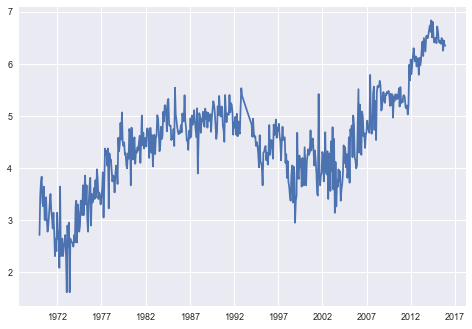

In [385]:
plt.plot(ts_log)

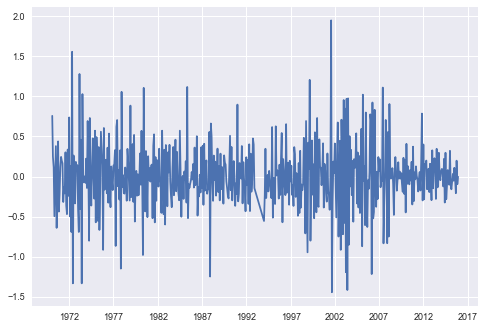

In [386]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


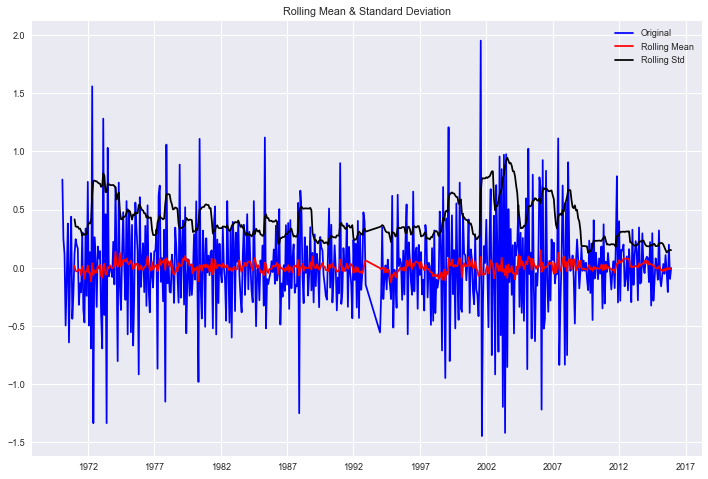

Results of Dickey-Fuller Test:
Test Statistic                -1.110970e+01
p-value                        3.686433e-20
#Lags Used                     8.000000e+00
Number of Observations Used    5.300000e+02
Critical Value (5%)           -2.867009e+00
Critical Value (1%)           -3.442749e+00
Critical Value (10%)          -2.569683e+00
dtype: float64


In [387]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [388]:
##log difference is stationary with 99% confidence

In [392]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

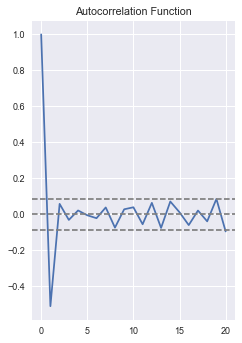

In [393]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [396]:
# p – The lag value where the PACF chart crosses the upper confidence interval 
# for the first time. 
# q – The lag value where the ACF chart crosses the upper confidence interval 
# for the first time. 

In [ ]:
## p = 1, q = 1, d = 1

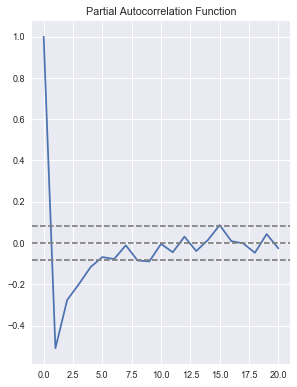

In [394]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [397]:
from statsmodels.tsa.arima_model import ARIMA

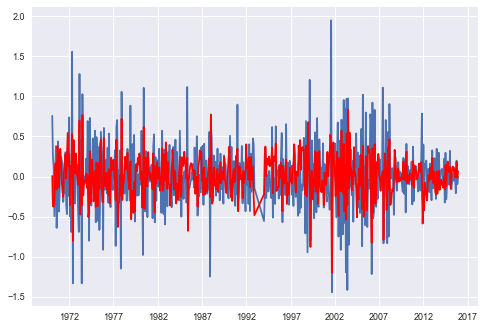

In [404]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [405]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

yearmonth
1970-02-01    0.005805
1970-03-01   -0.372597
1970-04-01   -0.376705
1970-05-01   -0.320884
1970-06-01    0.154951
dtype: float64


In [406]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

yearmonth
1970-01-01    2.708050
1970-02-01    2.713855
1970-03-01    2.341258
1970-04-01    1.964553
1970-05-01    1.643669
dtype: float64

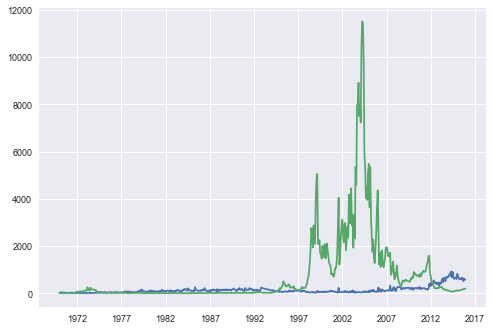

In [411]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(tsdf3["sum"])
plt.plot(predictions_ARIMA)

In [413]:
tsdf3.head()

sum  change  SAD  SADchange
yearmonth                               
1970-01-01  15.0     NaN  NaN        NaN
1970-02-01  32.0    17.0  NaN        NaN
1970-03-01  41.0     9.0  NaN        NaN
1970-04-01  46.0     5.0  NaN        NaN
1970-05-01  28.0   -18.0  NaN        NaN

In [417]:
tsdf3["predict"] = predictions_ARIMA

In [422]:
tsdf3.loc["1994"]

sum  change    SAD  SADchange     predict
yearmonth                                              
1994-01-01  125.0   -93.0   -6.0     -121.0   20.654502
1994-02-01   99.0   -26.0  -19.0      -13.0   27.145873
1994-03-01  140.0    41.0   -5.0       14.0   39.474851
1994-04-01  107.0   -33.0    4.0        9.0   39.660698
1994-05-01   98.0    -9.0  -56.0      -60.0   49.109215
1994-06-01  100.0     2.0    0.0       56.0   61.336913
1994-07-01   83.0   -17.0  -50.0      -50.0   70.998424
1994-08-01   89.0     6.0  -21.0       29.0   91.165101
1994-09-01   83.0    -6.0  -22.0       -1.0  103.608782
1994-10-01   72.0   -11.0  -97.0      -75.0  120.214718
1994-11-01   55.0   -17.0 -197.0     -100.0  149.517002
1994-12-01  102.0    47.0 -116.0       81.0  215.020993

In [415]:
predictions_ARIMA

yearmonth
1970-01-01      15.000000
1970-02-01      15.087329
1970-03-01      10.394306
1970-04-01       7.131722
1970-05-01       5.174119
1970-06-01       6.041307
1970-07-01       7.148564
1970-08-01       6.071094
1970-09-01       8.863056
1970-10-01      11.613092
1970-11-01      10.118599
1970-12-01      12.898350
1971-01-01      18.218876
1971-02-01      21.340378
1971-03-01      19.907540
1971-04-01      16.431477
1971-05-01      12.760231
1971-06-01      13.703257
1971-07-01      16.040298
1971-08-01      21.156047
1971-09-01      20.531868
1971-10-01      26.653750
1971-11-01      46.001232
1971-12-01      52.498455
1972-01-01      69.585649
1972-02-01      48.682455
1972-03-01      55.638011
1972-04-01      55.531480
1972-05-01      94.483096
1972-06-01      42.196235
1972-07-01      66.630330
1972-08-01      75.596675
1972-09-01      78.534996
1972-10-01     104.796166
1972-11-01     112.321141
1972-12-01     111.630235
1973-01-01     100.314041
1973-02-01     127.458956
19

In [425]:

PART1 = tsdf3.loc["1970":"1992",:]
PART2 = tsdf3.loc["1994":"2015",:]

In [513]:
ts_log = np.log(PART1["sum"])

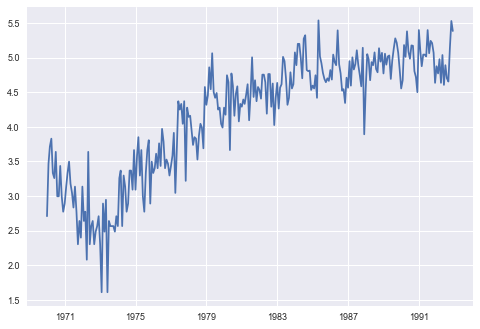

In [514]:
plt.plot(ts_log)

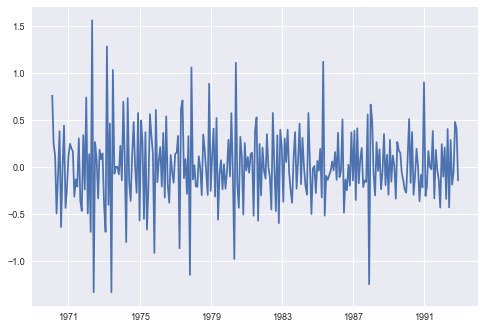

In [515]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


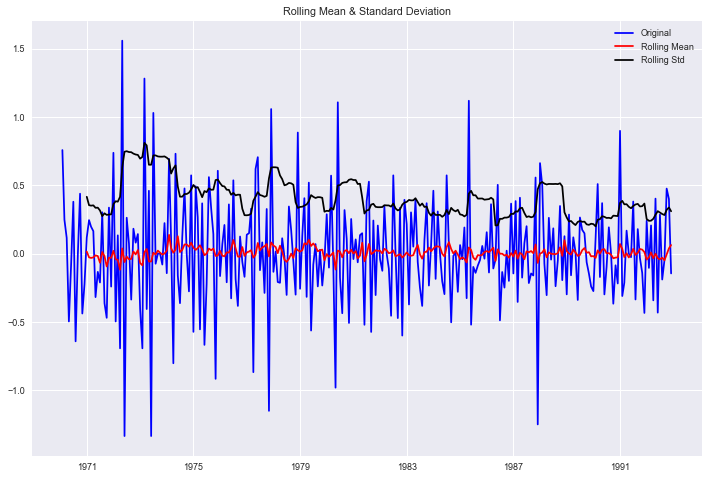

Results of Dickey-Fuller Test:
Test Statistic                -8.859181e+00
p-value                        1.499006e-14
#Lags Used                     8.000000e+00
Number of Observations Used    2.660000e+02
Critical Value (5%)           -2.872468e+00
Critical Value (1%)           -3.455175e+00
Critical Value (10%)          -2.572593e+00
dtype: float64


In [516]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

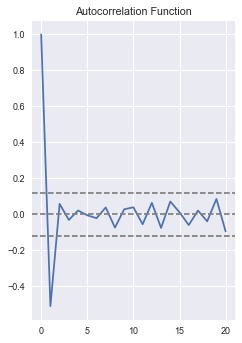

In [517]:

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

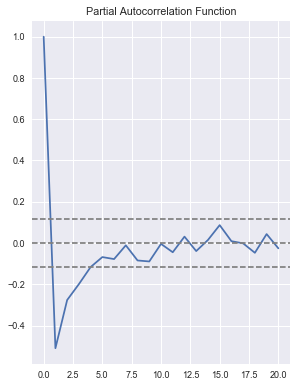

In [518]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

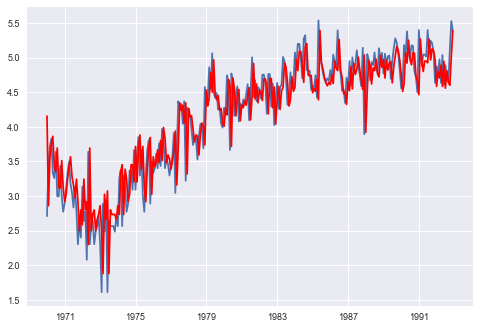

In [522]:
model = ARIMA(ts_log, order=(1, 0, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log)
plt.plot(results_ARIMA.fittedvalues, color='red')

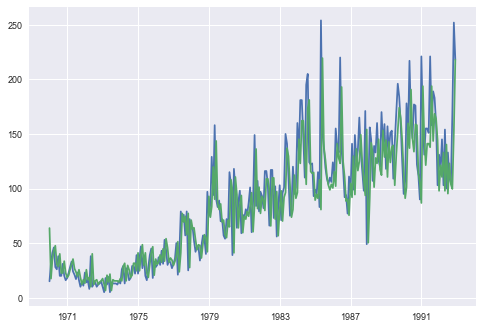

In [529]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
#predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_diff)
plt.plot(PART1["sum"])
plt.plot(predictions_ARIMA)

In [530]:
PART1["predict"] = predictions_ARIMA
PART1.loc["1992"]

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


sum  change    SAD  SADchange     predict
yearmonth                                              
1992-01-01  131.0    28.0  -90.0     -103.0   97.902083
1992-02-01  118.0   -13.0  -44.0       46.0  121.389400
1992-03-01  145.0    27.0   14.0       58.0  110.558459
1992-04-01  103.0   -42.0  -52.0      -66.0  132.927146
1992-05-01  154.0    51.0   -1.0       51.0   97.902083
1992-06-01  100.0   -54.0  -51.0      -50.0  140.281505
1992-07-01  133.0    33.0  -88.0      -37.0   95.348180
1992-08-01  110.0   -23.0  -48.0       40.0  123.045336
1992-09-01  105.0    -5.0  -84.0      -36.0  103.831060
1992-10-01  169.0    64.0  -14.0       70.0   99.600305
1992-11-01  252.0    83.0   93.0      107.0  152.439382
1992-12-01  218.0   -34.0  115.0       22.0  217.901243

In [531]:
PART1.loc["1992","sum"].sum()

1738.0

In [532]:
PART1.loc["1991","sum"].sum()

1988.0

In [533]:
PART1.loc["1992","predict"].sum()

1493.1261835456676

In [534]:
PART1.loc["1991","predict"].sum()

1782.5481332700003

In [535]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    sum   No. Observations:                  276
Model:                     ARMA(1, 0)   Log Likelihood                -137.728
Method:                       css-mle   S.D. of innovations              0.397
Date:                Thu, 11 May 2017   AIC                            281.456
Time:                        00:47:39   BIC                            292.318
Sample:                    01-01-1970   HQIC                           285.815
                         - 12-01-1992                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1548      0.220     18.924      0.000       3.724       4.585
ar.L1.sum      0.8942      0.027     32.834      0.000       0.841       0.948
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1183           +0.0000j            1.1183            0.0000
-----------------------------------------------------------------------------
"""

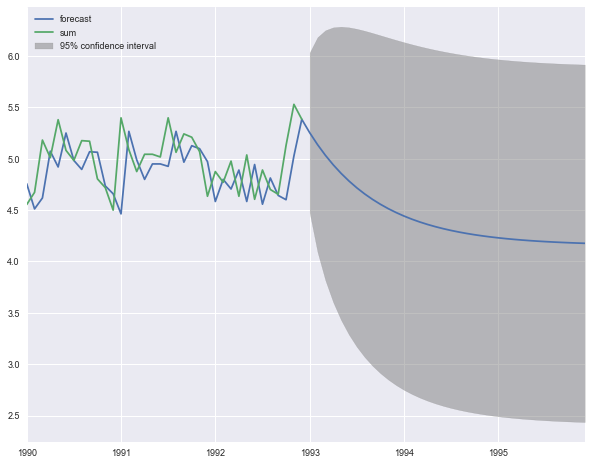

In [536]:
fig, ax = plt.subplots(figsize=(10,8))
fig = results_ARIMA.plot_predict(start = "1990-01-01", end = "1995-12-01", ax = ax)
legend = ax.legend(loc='upper left')


In [538]:
rl = results_ARIMA.predict(start = "1990-01-01", end = "1995-12-01")

In [539]:
rls = pd.Series(rl, copy = True)

In [541]:
fillitin = np.exp(rls)

In [544]:
quiche = tsdf3.loc["1990":"1995",:]

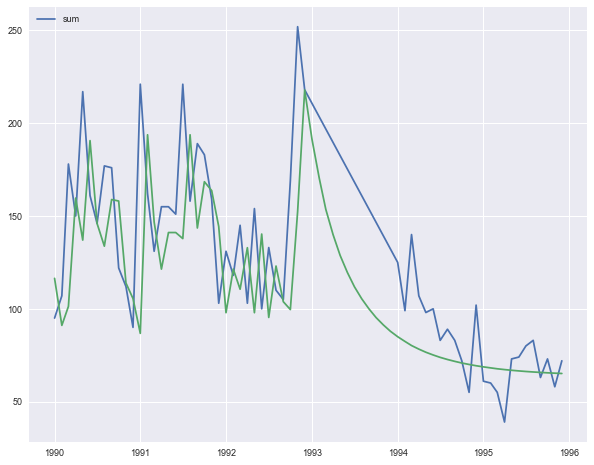

In [547]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(quiche["sum"])
plt.plot(fillitin)
legend = ax.legend(loc='upper left')

In [549]:
quiche.loc["1992"]["sum"].sum()

1738.0

In [554]:
impute = pd.DataFrame(fillitin, columns = ["prediction"])

In [556]:
impute.loc["1992"].prediction.sum()

1493.1261835456676

In [557]:
impute.loc["1993"].prediction.sum()

1495.2652135616154

In [558]:
impute.loc["1994"].prediction.sum()

906.0012048521072

In [559]:
quiche.loc["1994"]["sum"].sum()

1153.0

# ARIMA MODEL PREDICTS 1495 BOMBINGS IN 1993

In [ ]:
## The Appendix of the codebook notes that there were 4954 incidents
##recorded in 1993, before records were lost
##writ large, bombings make up ~48% of incidents over the dataset

In [563]:
#count gives us number of attacks that year
#sum gives us number of bombings that year
#mean gives us the probability that an attack is a bombing for that year

data.groupby("year").is_bombing.agg(["count", "sum", "mean"])

count   sum      mean
year                       
1970    651   333  0.511521
1971    470   238  0.506383
1972    494   186  0.376518
1973    473   149  0.315011
1974    580   284  0.489655
1975    740   370  0.500000
1976    923   419  0.453954
1977   1319   635  0.481425
1978   1526   644  0.422018
1979   2661  1057  0.397219
1980   2663   997  0.374390
1981   2585  1082  0.418569
1982   2545  1125  0.442043
1983   2870  1246  0.434146
1984   3494  1775  0.508014
1985   2915  1482  0.508405
1986   2860  1506  0.526573
1987   3184  1476  0.463568
1988   3721  1650  0.443429
1989   4322  1797  0.415780
1990   3887  1731  0.445331
1991   4683  1988  0.424514
1992   5073  1738  0.342598
1994   3458  1153  0.333430
1995   3081   791  0.256735
1996   3056  1217  0.398233
1997   3200  1123  0.350938
1998    933   504  0.540193
1999   1396   652  0.467049
2000   1813   904  0.498621
2001   1908   802  0.420335
2002   1332   721  0.541291
2003   1262   678  0.537242
2004   1161   655  0.564169
2005   2011  1064  0.529090
2006   2751  1502  0.545983
2007   3241  1865  0.575440
2008   4787  2642  0.551911
2009   4721  2565  0.543317
2010   4821  2507  0.520017
2011   5067  2587  0.510559
2012   8498  5080  0.597788
2013  11990  6669  0.556214
2014  16840  8759  0.520131
2015  14806  7615  0.514319

In [ ]:
##It looks like in 1993 we would have approximately a 34% chance of
##an attack being a bombing, so that gives us 

In [566]:
4954.*0.34

1684.3600000000001

In [567]:
##1684 bombings

## PART 2 - Bayesian Inference

In [568]:
%config InlineBackend.figure_format = 'retina'
import pymc3 as pm

Couldn't import dot_parser, loading of dot files will not be possible.


In [584]:
data[data.year == 1990].shape

(3887, 138)

In [581]:
data.groupby("attacktype1_txt").year.value_counts() ##877 assassinations in 1990, 3887 attacks

attacktype1_txt  year
Armed Assault    2014    4087
                 2015    3353
                 2013    2959
                 2012    2081
                 2011    1391
                 1992    1327
                 1991    1271
                 1989    1120
                 2009    1118
                 2010    1114
                 2008    1093
                 1988     921
                 1990     876
                 1983     852
                 2007     848
                 1997     826
                 1984     823
                 1994     818
                 1987     798
                 1995     740
                 2006     737
                 1981     697
                 1982     665
                 1985     659
                 1996     638
                 1986     592
                 2001     581
                 1980     574
                 2005     510
                 2000     492
                 1979     447
                 1999     368
                 2

In [ ]:
##Looking only at 1990

In [585]:
nineoh = data[data.year == 1990]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

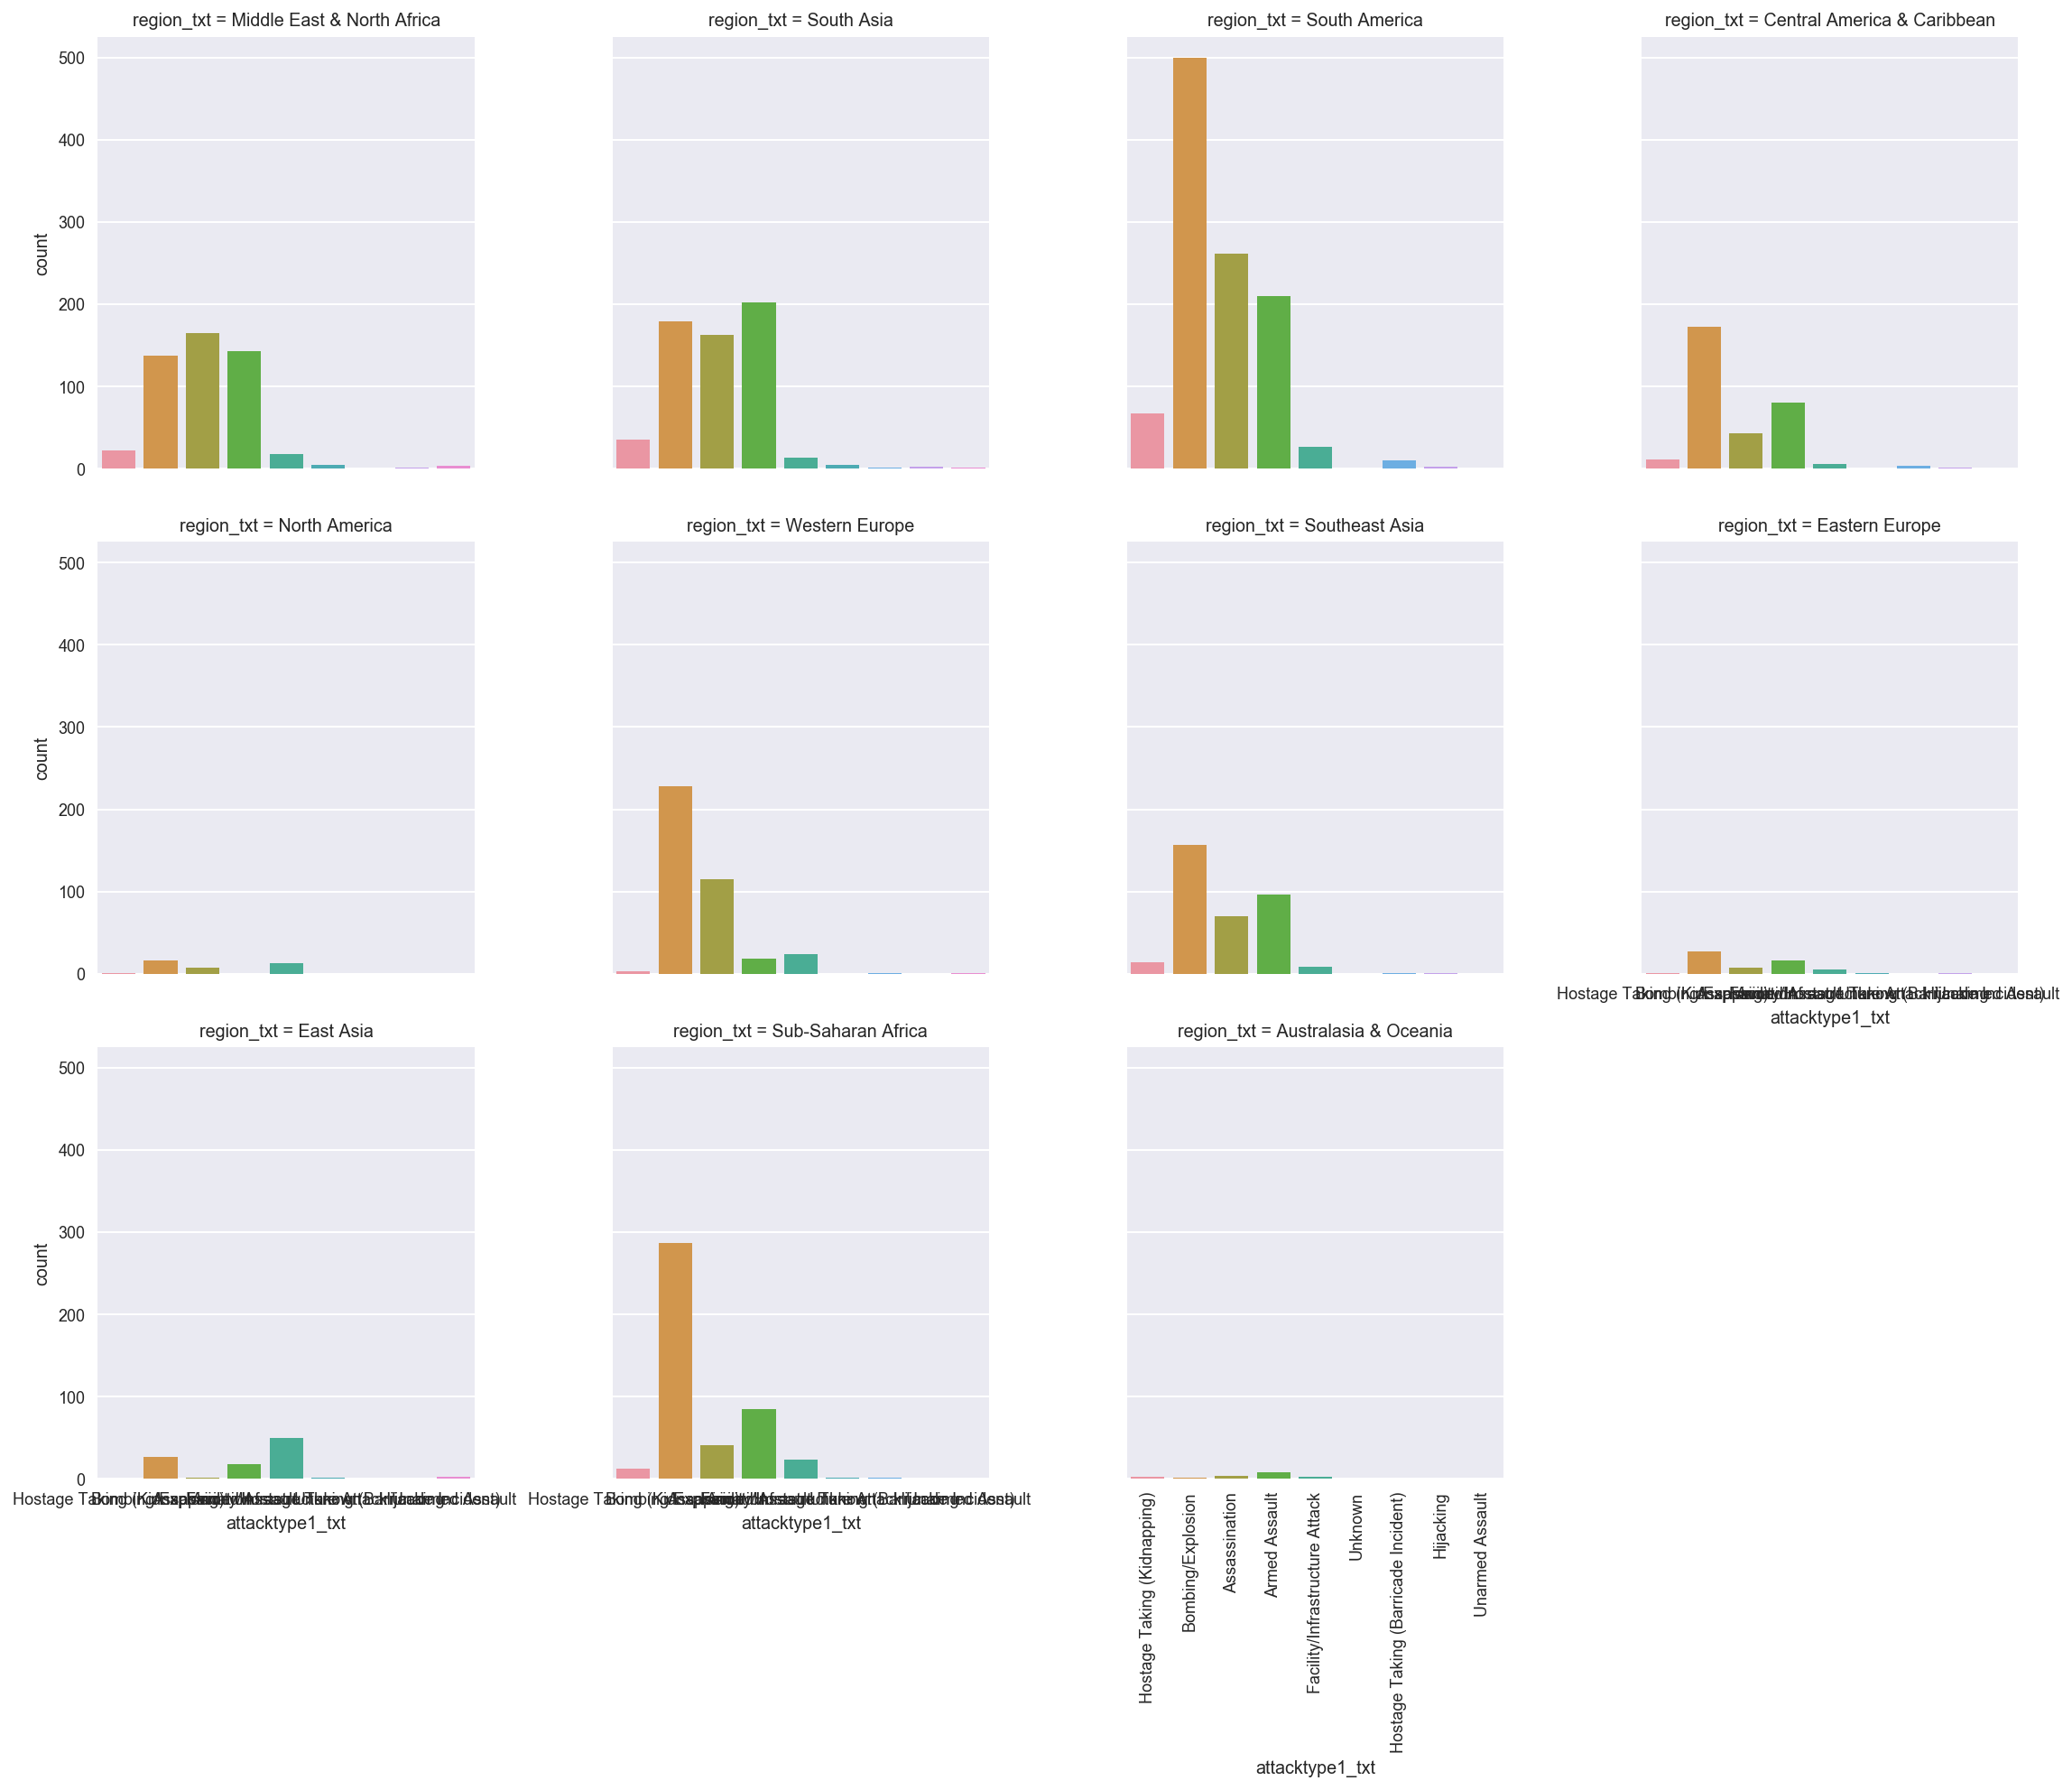

In [586]:
g = sns.factorplot(x="attacktype1_txt", col="region_txt", 
                   data=nineoh, kind="count", col_wrap=4)

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

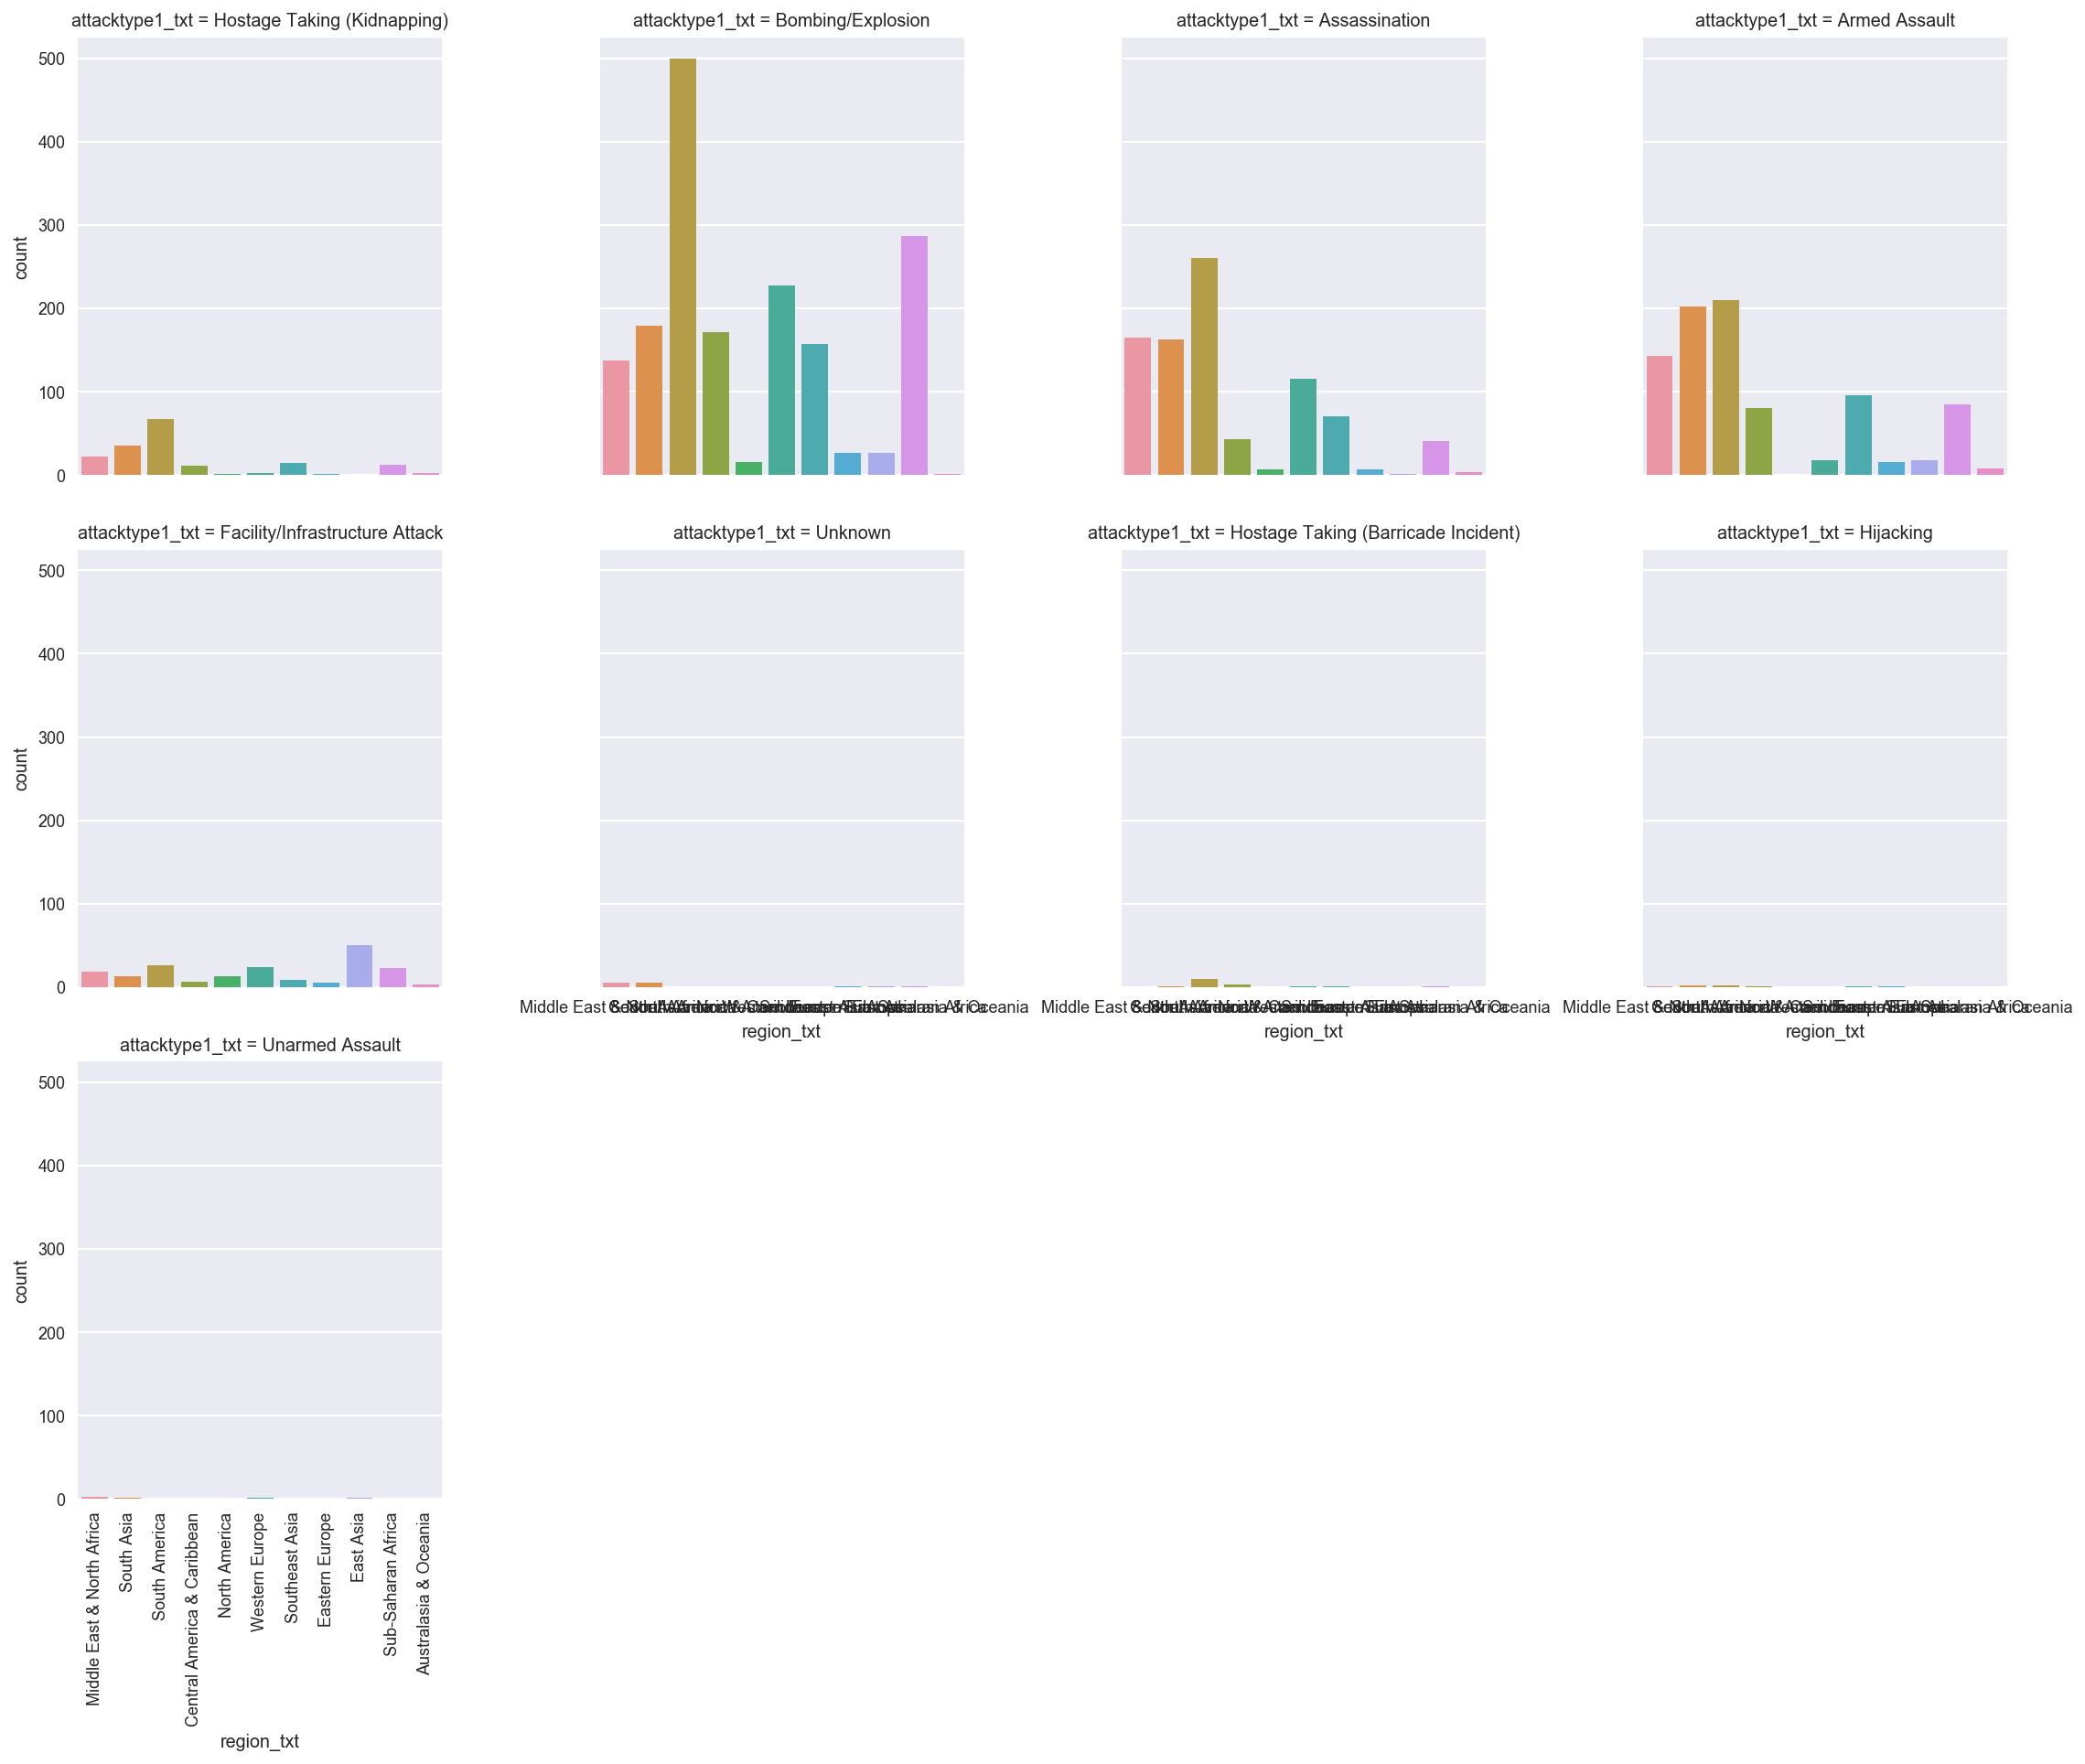

In [589]:
g = sns.factorplot(x="region_txt", col="attacktype1_txt", 
                   data=nineoh, kind="count", col_wrap=4)

plt.xticks(rotation = 90)

In [595]:
bae = data[data.region_txt =="Sub-Saharan Africa"][data.year == 1990]

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [603]:
pd.set_option('display.max_rows', 50)
bae

eventid  year  month  day approxdate  extended resolution  \
41070  199001090001  1990      1    9 1990-01-09         0        NaN   
41079  199001100002  1990      1   10 1990-01-10         0        NaN   
41108  199001130001  1990      1   13 1990-01-13         0        NaN   
41109  199001130002  1990      1   13 1990-01-13         0        NaN   
41126  199001150001  1990      1   15 1990-01-15         0        NaN   
41134  199001160001  1990      1   16 1990-01-16         0        NaN   
41135  199001160002  1990      1   16 1990-01-16         0        NaN   
41136  199001160003  1990      1   16 1990-01-16         0        NaN   
41157  199001180002  1990      1   18 1990-01-18         0        NaN   
41229  199001260001  1990      1   26 1990-01-26         0        NaN   
41230  199001260002  1990      1   26 1990-01-26         0        NaN   
41231  199001260003  1990      1   26 1990-01-26         0        NaN   
41257  199001290009  1990      1   29 1990-01-29         0        NaN   
41272  199001300013  1990      1   30 1990-01-30         0        NaN   
41273  199001300014  1990      1   30 1990-01-30         0        NaN   
41274  199001300015  1990      1   30 1990-01-30         0        NaN   
41286  199002020002  1990      2    2 1990-02-02         1    2/22/90   
41307  199002040009  1990      2    4 1990-02-04         0        NaN   
41308  199002040010  1990      2    4 1990-02-04         0        NaN   
41359  199002100014  1990      2   10 1990-02-10         1    2/10/90   
41366  199002120001  1990      2   12 1990-02-12         0        NaN   
41367  199002120002  1990      2   12 1990-02-12         0        NaN   
41368  199002120003  1990      2   12 1990-02-12         0        NaN   
41369  199002120004  1990      2   12 1990-02-12         0        NaN   
41370  199002120005  1990      2   12 1990-02-12         0        NaN   
...             ...   ...    ...  ...        ...       ...        ...   
44557  199011200003  1990     11   20 1990-11-20         0        NaN   
44579  199011230002  1990     11   23 1990-11-23         0        NaN   
44638  199011290001  1990     11   29 1990-11-29         0        NaN   
44639  199011290002  1990     11   29 1990-11-29         0        NaN   
44640  199011290003  1990     11   29 1990-11-29         0        NaN   
44641  199011290004  1990     11   29 1990-11-29         0        NaN   
44642  199011290005  1990     11   29 1990-11-29         0        NaN   
44643  199011290006  1990     11   29 1990-11-29         0        NaN   
44644  199011290007  1990     11   29 1990-11-29         0        NaN   
44645  199011290008  1990     11   29 1990-11-29         0        NaN   
44646  199011290009  1990     11   29 1990-11-29         0        NaN   
44647  199011290010  1990     11   29 1990-11-29         0        NaN   
44648  199011290011  1990     11   29 1990-11-29         0        NaN   
44657  199011290020  1990     11   29 1990-11-29         0        NaN   
44658  199011290021  1990     11   29 1990-11-29         0        NaN   
44659  199011290022  1990     11   29 1990-11-29         0        NaN   
44661  199011300001  1990     11   30 1990-11-30         0        NaN   
44725  199012070001  1990     12    7 1990-12-07         0        NaN   
44811  199012160001  1990     12   16 1990-12-16         0        NaN   
44828  199012170007  1990     12   17 1990-12-17         0        NaN   
44832  199012190001  1990     12   19 1990-12-19         0        NaN   
44839  199012200002  1990     12   20 1990-12-20         0        NaN   
44849  199012220001  1990     12   22 1990-12-22         0        NaN   
44860  199012250001  1990     12   25 1990-12-25         0        NaN   
44873  199012280001  1990     12   28 1990-12-28         0        NaN   

       country   country_txt  region          region_txt      provstate  \
41070        8        Angola      11  Sub-Saharan Africa         Luanda   
41079      213        Uganda      11  Sub-Saharan Africa        U

In [637]:
bae2 = bae[bae.country_txt != "South Africa"]
bae2 = bae2[bae2.country_txt != "Uganda"]

In [599]:
bae.country_txt.value_counts()

Angola                   205
South Africa             154
Mozambique                23
Uganda                    14
Somalia                   12
Senegal                   11
Ethiopia                  10
Zimbabwe                   6
Zambia                     4
Liberia                    4
Namibia                    2
Botswana                   1
Djibouti                   1
Republic of the Congo      1
Mali                       1
Sudan                      1
Name: country_txt, dtype: int64

In [638]:
bae2.country_txt.value_counts()

Angola                   205
Mozambique                23
Somalia                   12
Senegal                   11
Ethiopia                  10
Zimbabwe                   6
Zambia                     4
Liberia                    4
Namibia                    2
Botswana                   1
Mali                       1
Djibouti                   1
Republic of the Congo      1
Sudan                      1
Name: country_txt, dtype: int64

In [601]:
SA = bae[bae.country_txt == "South Africa"]

In [602]:
SA.attacktype1_txt.value_counts()

Bombing/Explosion                 67
Armed Assault                     34
Assassination                     31
Facility/Infrastructure Attack    21
Hostage Taking (Kidnapping)        1
Name: attacktype1_txt, dtype: int64

In [608]:
sa = bae[bae.country_txt == "South Africa"].nwound.values

In [617]:
ug = bae[bae.country_txt == "Uganda"].nwound.values

In [639]:
mean_prior_mean = bae2.nwound.mean()
mean_prior_std = bae2.nwound.std()

In [640]:
# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:

    groupSA_mean = pm.Normal('Wounded_SA_mean', mean_prior_mean, sd=mean_prior_std)
    groupUG_mean = pm.Normal('Wounded_UG_mean', mean_prior_mean, sd=mean_prior_std)

In [641]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    groupSA_std = pm.Uniform('Wounded_SA_std', lower=std_prior_lower, upper=std_prior_upper)
    groupUG_std = pm.Uniform('Wounded_UG_std', lower=std_prior_lower, upper=std_prior_upper)

In [642]:
with model:

    groupSA = pm.Normal('Wounded_SA', mu=groupSA_mean, sd=groupSA_std, observed=sa)
    groupUG = pm.Normal('Wounded_UG', mu=groupUG_mean, sd=groupUG_std, observed=ug)

In [643]:
with model:

    diff_of_means = pm.Deterministic('difference of means', groupSA_mean - groupUG_mean)
    diff_of_stds = pm.Deterministic('difference of stds', groupSA_std - groupUG_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((groupSA_std**2 + groupUG_std**2) / 2))

In [644]:
with model:
    trace = pm.sample(25000, njobs=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -614.48: 100%|██████████| 200000/200000 [00:30<00:00, 6465.19it/s]
Finished [100%]: Average ELBO = -614.48
100%|██████████| 25000/25000 [00:40<00:00, 612.57it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x169df7290>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x169443810>], dtype=object)

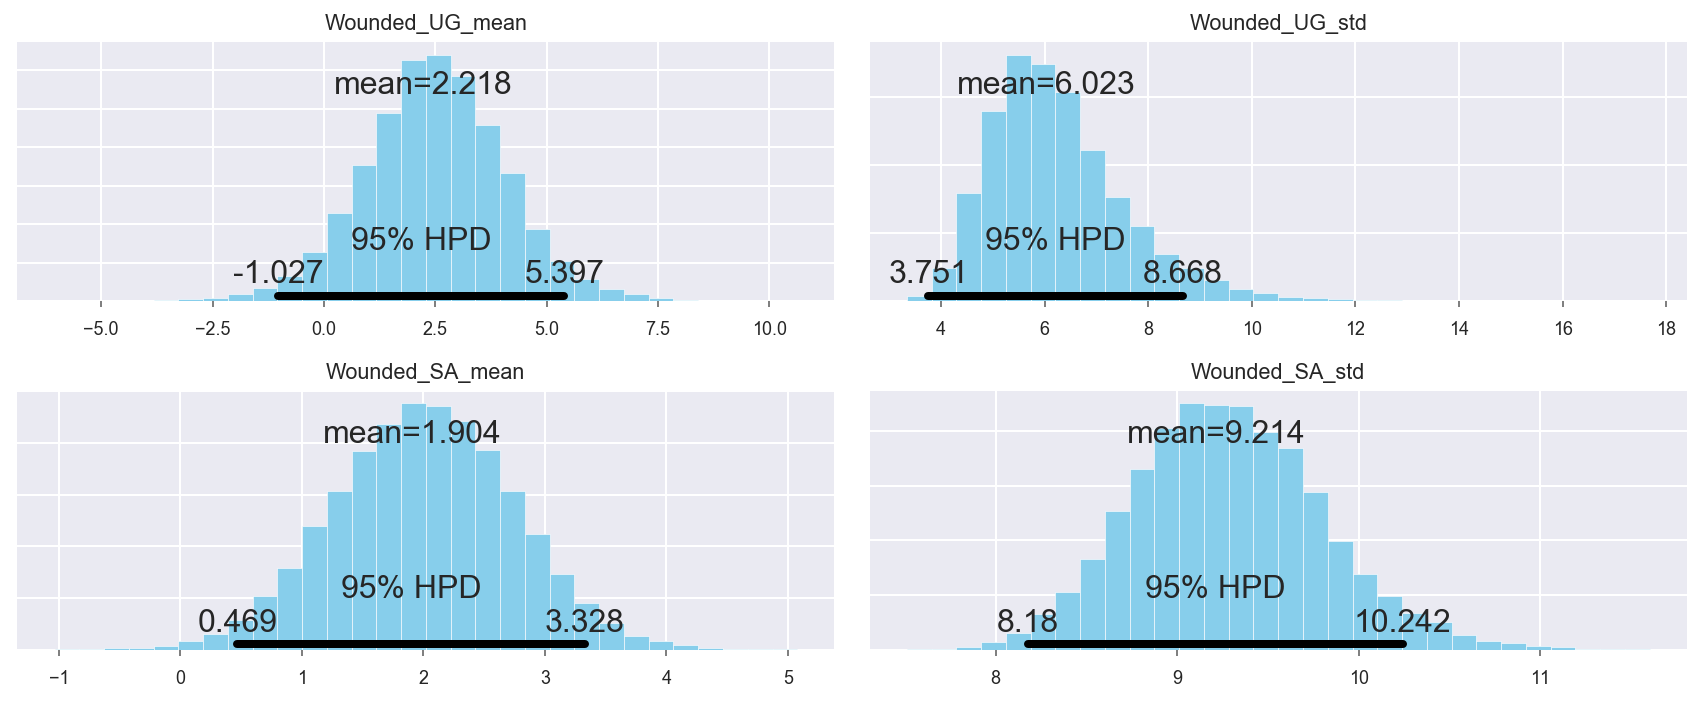

In [645]:
pm.plot_posterior(trace[3000:],
                  varnames=['Wounded_SA_mean', 'Wounded_UG_mean', 'Wounded_SA_std', 'Wounded_UG_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1644d6c10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x16651c6d0>], dtype=object)

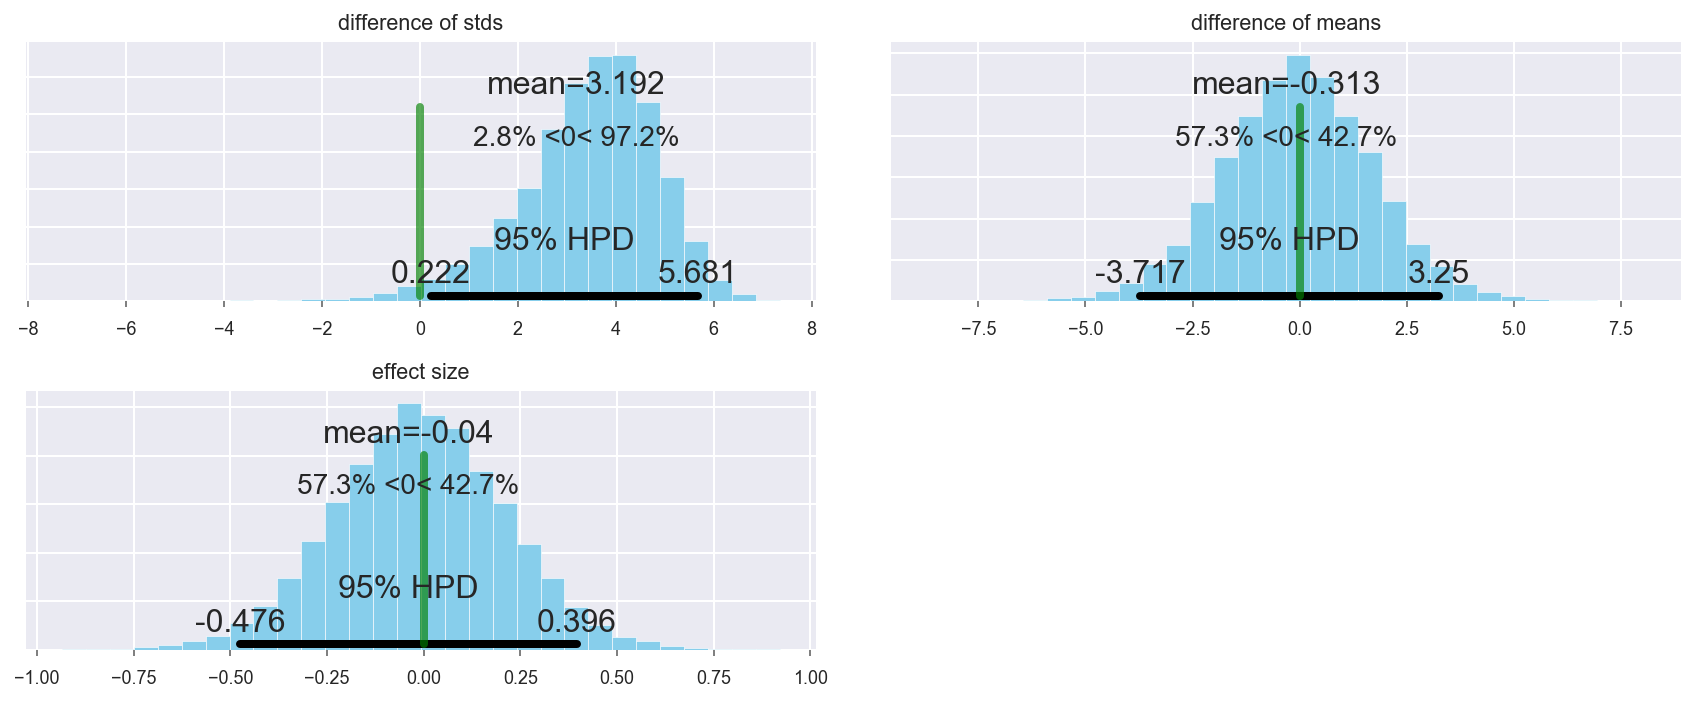

In [646]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [647]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.313           1.767            0.013            [-3.717, 3.250]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -3.815         -1.463         -0.319         0.828          3.173


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.192            1.435            0.012            [0.222, 5.681]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.129         2.412          3.364          4.180          5.507


effect size:

  Mean             SD               MC Error         95% HPD in

In [648]:
##When looking at casualty rates due to terror attacks in Sub-Saharan Africa for the year 1990,
##South Africa does not differ significantly from Uganda -- only the spread of the data differs significantly